In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

In [118]:
# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [119]:
# prompt: carga de datos desde google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
# Specify the file path in your Google Drive
file_path = '/content/drive/MyDrive/BBDD_ParaInciar_MakDigital (1).xlsx'  # Replace 'your_file.csv' with the actual file name and path

In [121]:
df = pd.read_excel(file_path)
df.columns


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Index(['IDENTIFICACION', 'NOMBRE', 'PERFILRIESGOENDEUDAMIENTO', 'EDAD', 'sexo',
       'estado_civil', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO', 'PAIS_DOM_CAL_DAT',
       'PROV_DOM_CAL_DAT', 'CIUDAD_DOM_CAL_DAT', 'DIR_DOM_CAL_DAT',
       'TEL_DOM_1_CAL_DAT', 'DIR_TRAB_1_CAL_DAT', 'TEL_TRA_1_CAL_DAT',
       'CELULAR_1', 'CELULAR_BAN', 'CORREO_BAN'],
      dtype='object')

Análisis de la variable 'EDAD':
count    16682.000000
mean        51.917636
std         14.487055
min         22.000000
25%         38.000000
50%         54.000000
75%         66.000000
max         74.000000
Name: EDAD, dtype: float64


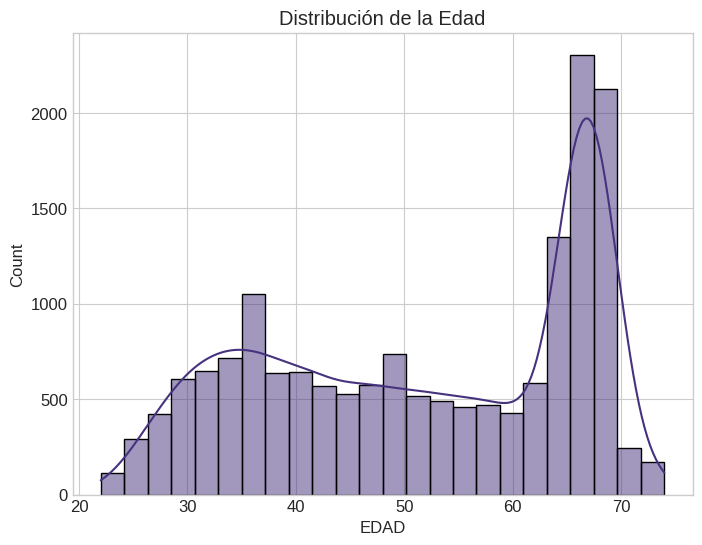


Análisis de la variable 'sexo':
sexo
FEMENINO     8624
MASCULINO    8058
Name: count, dtype: int64


<ipython-input-122-d33e512a1b65>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sexo', data=df, palette="viridis") # Utilice countplot y establezca una paleta


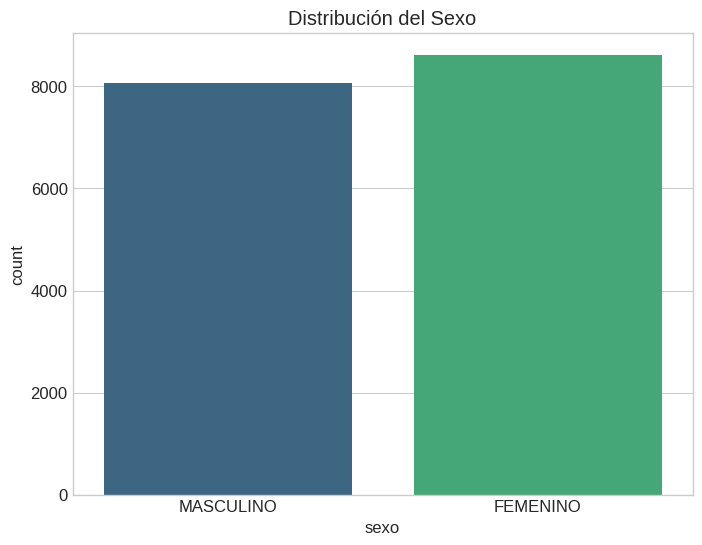


Análisis de la variable 'estado_civil':
estado_civil
CASADO                   10019
SOLTERO                   4005
DIVORCIADO                1754
VIUDO                      632
UNION LIBRE < 2 ANIOS      200
UNION LIBRE > 2 ANIOS       72
Name: count, dtype: int64


<ipython-input-122-d33e512a1b65>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='estado_civil', data=df, palette="viridis")


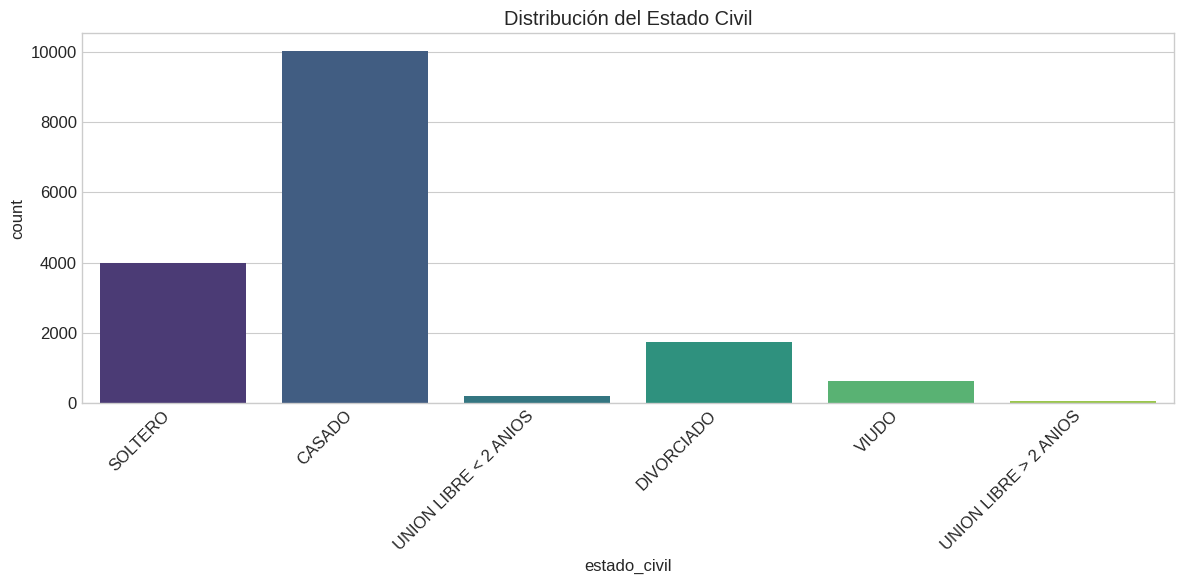


Análisis de la variable 'MAXIMA_TARJETA':
count    11859.000000
mean      3606.358040
std       4725.992054
min          0.000000
25%        900.000000
50%       1300.000000
75%       4400.000000
max      25000.000000
Name: MAXIMA_TARJETA, dtype: float64


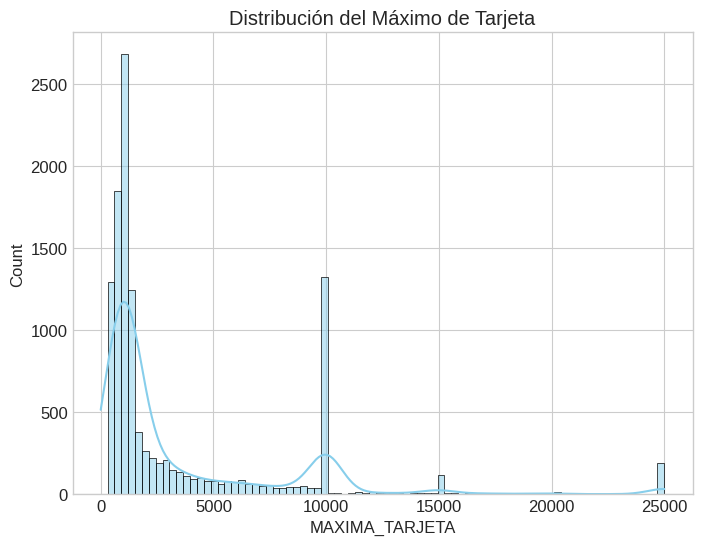


Análisis de la variable 'MAXIMO_CONSUMO':
count    10838.000000
mean      8783.327182
std       8632.709979
min        600.000000
25%       2400.000000
50%       4800.000000
75%      13500.000000
max      25000.000000
Name: MAXIMO_CONSUMO, dtype: float64


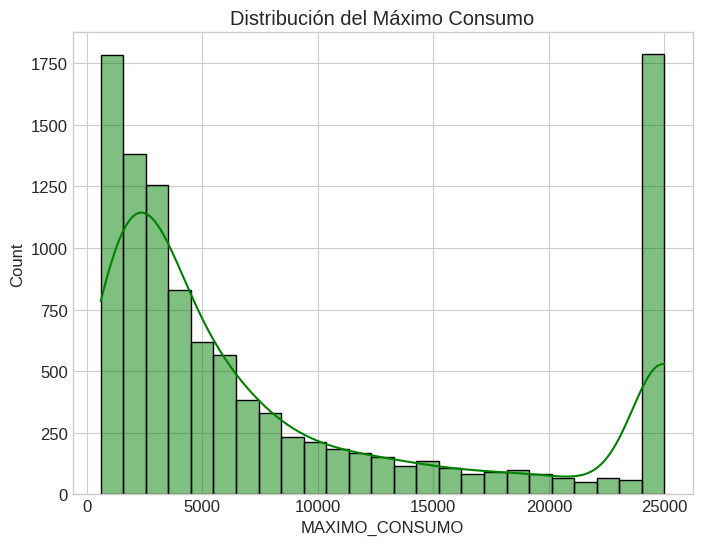

In [122]:
# Análisis exploratorio de variables seleccionadas

# Convertir 'EDAD' a numérica (si no lo está ya) y manejar valores no numéricos
df['EDAD'] = pd.to_numeric(df['EDAD'], errors='coerce')

# Análisis de la variable 'EDAD'
print("Análisis de la variable 'EDAD':")
print(df['EDAD'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['EDAD'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

# Análisis de la variable 'sexo'
print("\nAnálisis de la variable 'sexo':")
print(df['sexo'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='sexo', data=df, palette="viridis") # Utilice countplot y establezca una paleta
plt.title('Distribución del Sexo')
plt.show()

# Análisis de la variable 'estado_civil'
print("\nAnálisis de la variable 'estado_civil':")
print(df['estado_civil'].value_counts())
plt.figure(figsize=(12, 6))  # Mayor ancho de figura para un mejor espaciado de etiquetas
sns.countplot(x='estado_civil', data=df, palette="viridis")
plt.title('Distribución del Estado Civil')
plt.xticks(rotation=45, ha='right')  # Gire las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

# Análisis de la variable 'MAXIMA_TARJETA'
print("\nAnálisis de la variable 'MAXIMA_TARJETA':")
print(df['MAXIMA_TARJETA'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['MAXIMA_TARJETA'], kde=True, color="skyblue") #agregar los colores
plt.title('Distribución del Máximo de Tarjeta')
plt.show()

# Análisis de la variable 'MAXIMO_CONSUMO'
print("\nAnálisis de la variable 'MAXIMO_CONSUMO':")
print(df['MAXIMO_CONSUMO'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['MAXIMO_CONSUMO'], kde=True, color="green") #agregar los colores
plt.title('Distribución del Máximo Consumo')
plt.show()

# Interpretación de los gráficos y resultados

# Análisis de la variable 'EDAD'
El histograma de la edad muestra la distribución de las edades de los clientes.
La estadística descriptiva (describe()) proporciona información sobre la media, desviación estándar, valores mínimo, máximo y percentiles.
La distribución visualizada permite identificar si existe una distribución normal o sesgada de las edades de los clientes, lo que será útil para la posterior segmentación.


# Análisis de la variable 'sexo'
El gráfico de barras (countplot) muestra la cantidad de clientes masculinos y femeninos.
El conteo de valores (value_counts()) proporciona la frecuencia absoluta de cada sexo, permitiendo ver el balance entre hombres y mujeres en la base de datos.  
Esta variable es crucial para la segmentación, ya que el comportamiento de compra puede diferir entre sexos.

# Análisis de la variable 'estado_civil'
El gráfico de barras (countplot) muestra la distribución de los clientes según su estado civil.
El conteo de valores (value_counts()) facilita la comprensión de las proporciones de cada categoría.
Esta información puede utilizarse para crear segmentos basados en el estado civil y así comprender sus necesidades y motivaciones de compra.

# Análisis de la variable 'MAXIMA_TARJETA'
El histograma de 'MAXIMA_TARJETA' muestra la distribución del límite de crédito máximo de las tarjetas de los clientes.
Las estadísticas descriptivas ofrecen información como la media, desviación estándar y los valores máximo y mínimo de los límites de crédito.
La distribución visualizada proporciona información sobre la concentración de los límites de crédito. Es esencial para la segmentación, ya que clientes con mayores límites de crédito podrían tener un comportamiento de compra diferente.

# Análisis de la variable 'MAXIMO_CONSUMO'
El histograma de 'MAXIMO_CONSUMO' visualiza la distribución del monto máximo de consumo de los clientes.
Las estadísticas descriptivas proporcionan información sobre la media, desviación estándar, valores máximo y mínimo de consumo.
La visualización ayuda a identificar patrones de consumo y la dispersión del gasto.
Se podría usar para segmentar a los clientes en diferentes categorías de consumo.

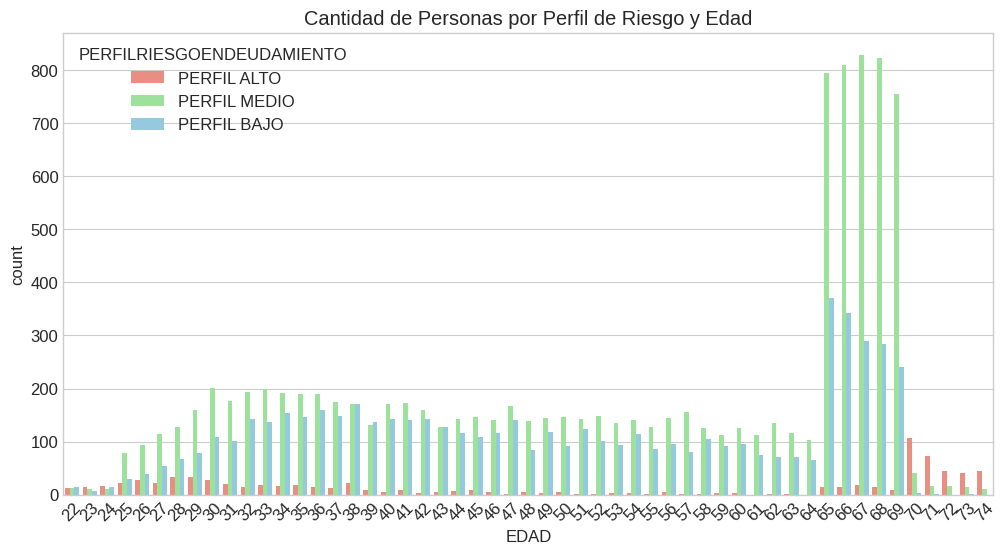

<ipython-input-123-c1647bcaaa72>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x_col, y=y_col, data=df, palette=color_map)


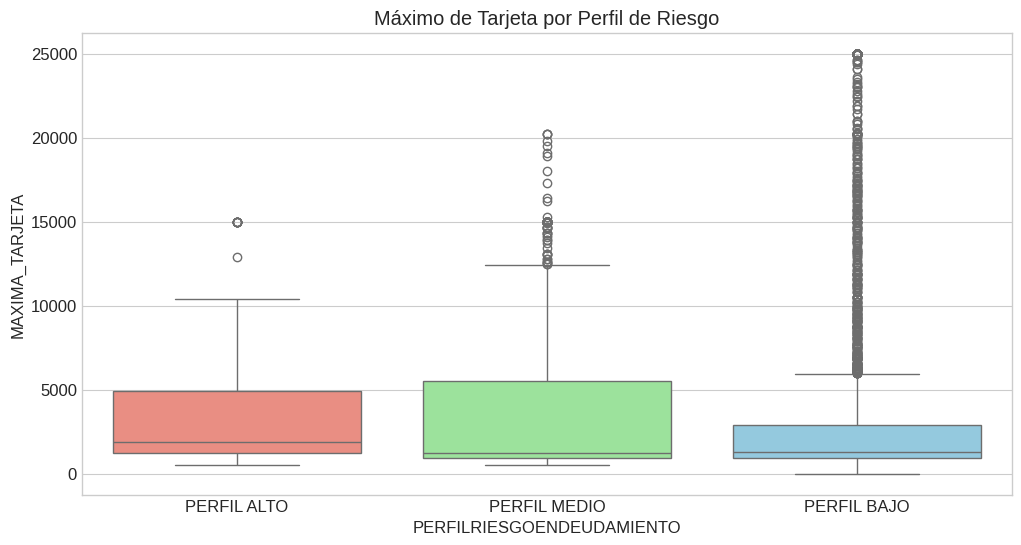

<ipython-input-123-c1647bcaaa72>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x_col, y=y_col, data=df, palette=color_map)


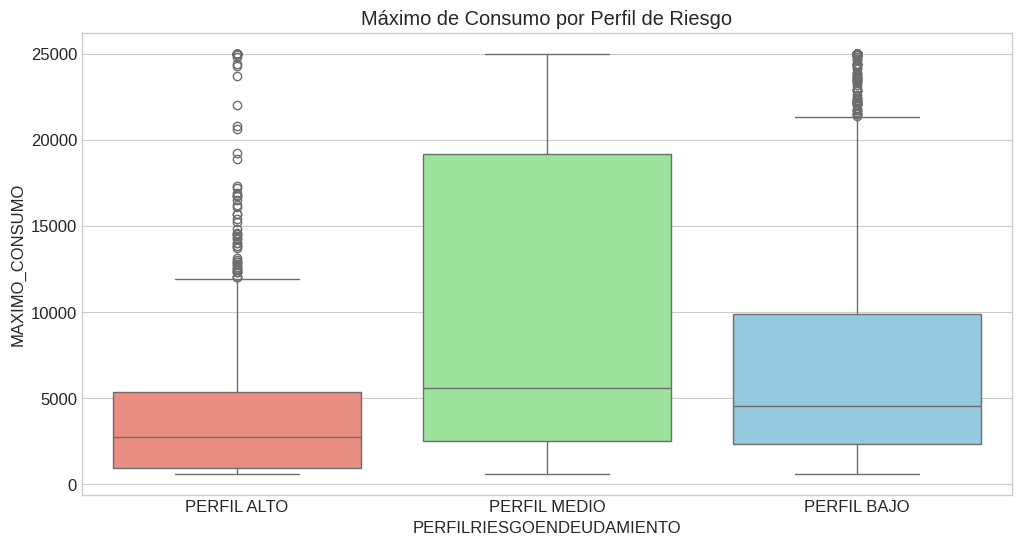

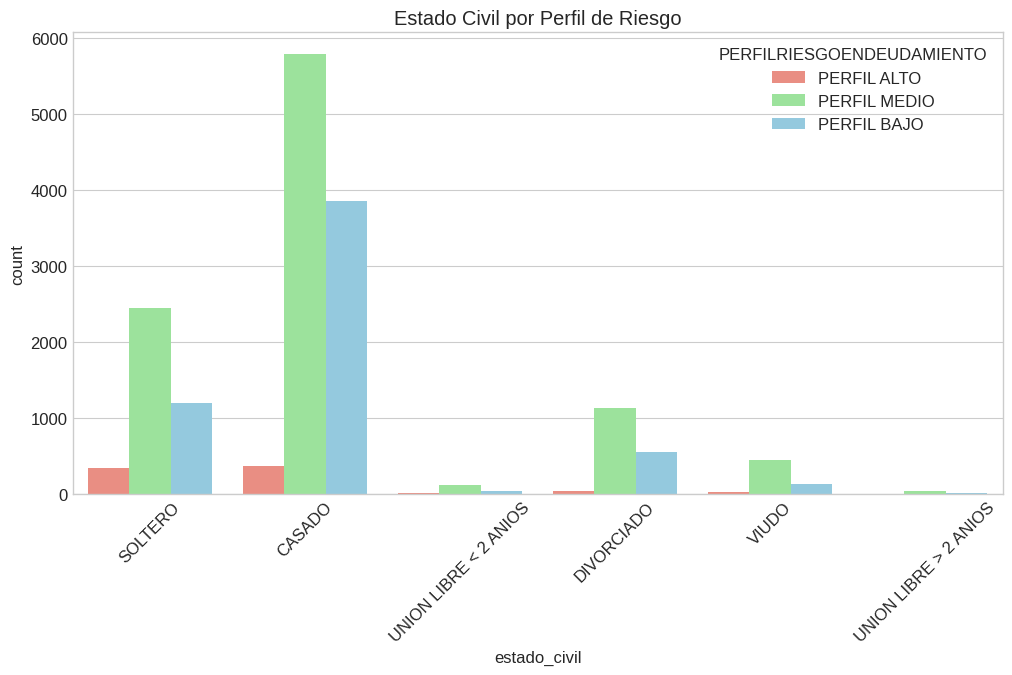

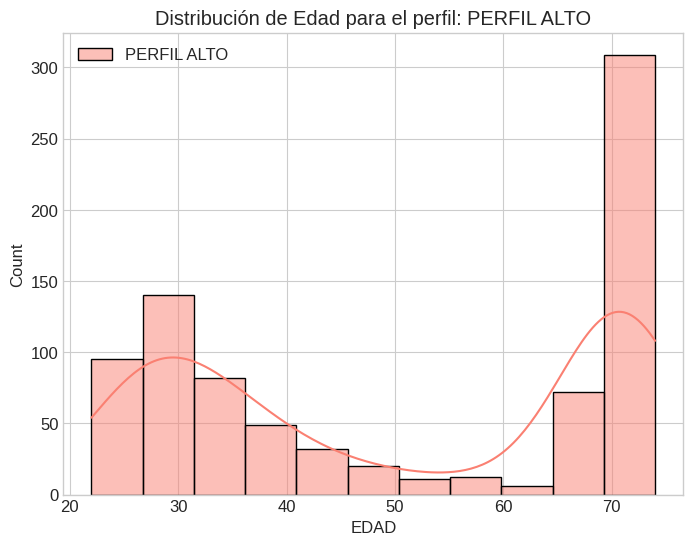

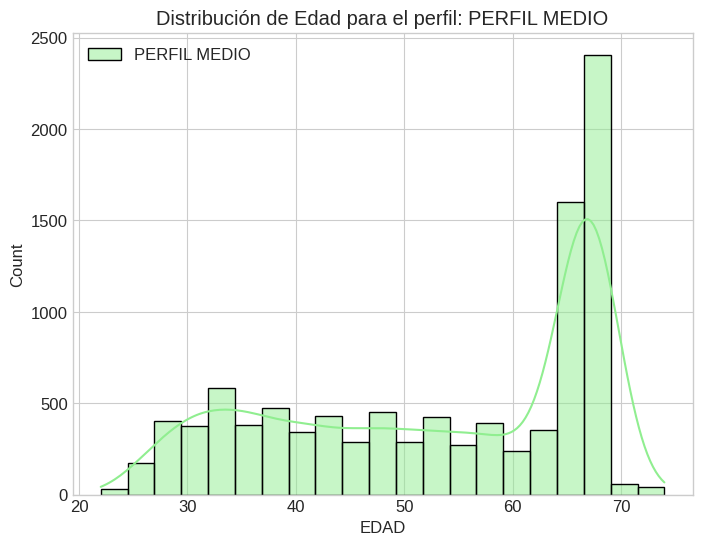

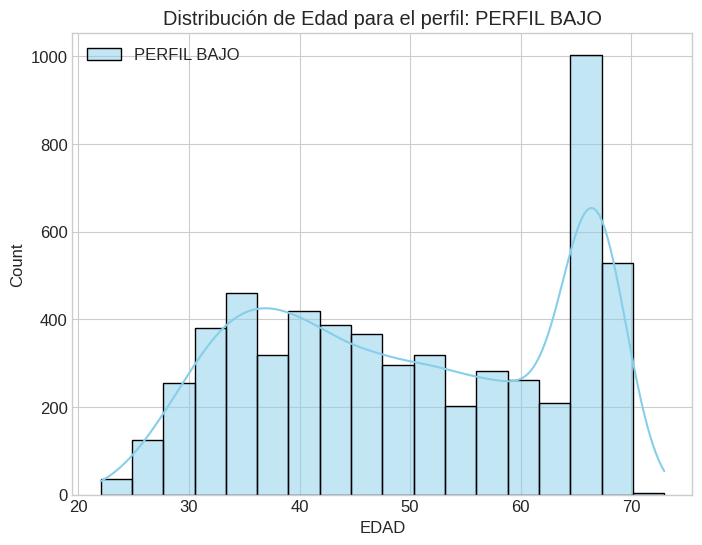

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define color_map here, before the functions that use it
color_map = {
    'PERFIL BAJO': 'skyblue',
    'PERFIL MEDIO': 'lightgreen',
    'PERFIL ALTO': 'salmon'
}

def plot_profile_analysis(df, x_col, y_col, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x_col, y=y_col, data=df, palette=color_map)
    plt.title(title)
    plt.show()


def plot_profile_vs_age(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='EDAD', hue='PERFILRIESGOENDEUDAMIENTO', data=df, palette=color_map)
    plt.title('Cantidad de Personas por Perfil de Riesgo y Edad')
    plt.xticks(rotation=45)
    plt.show()

def plot_marital_status_by_profile(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='estado_civil', hue='PERFILRIESGOENDEUDAMIENTO', data=df, palette=color_map)
    plt.title('Estado Civil por Perfil de Riesgo')
    plt.xticks(rotation=45)
    plt.show()


# Análisis de 'PERFILRIESGOENDEUDAMIENTO' vs. otras variables
plot_profile_vs_age(df)

plot_profile_analysis(df, 'PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'Máximo de Tarjeta por Perfil de Riesgo')
plot_profile_analysis(df, 'PERFILRIESGOENDEUDAMIENTO', 'MAXIMO_CONSUMO', 'Máximo de Consumo por Perfil de Riesgo')
plot_marital_status_by_profile(df)

# Análisis adicional: Distribución de edad por perfil
for perfil in df['PERFILRIESGOENDEUDAMIENTO'].unique():
    plt.figure(figsize=(8, 6))
    sns.histplot(df[df['PERFILRIESGOENDEUDAMIENTO'] == perfil]['EDAD'], kde=True, label=perfil, color=color_map.get(perfil, 'gray'))
    plt.title(f'Distribución de Edad para el perfil: {perfil}')
    plt.legend()
    plt.show()


# 1. Perfil de Riesgo vs. Edad:
  - El gráfico de conteo muestra la distribución de la edad dentro de cada perfil de riesgo.
  - Permite determinar si existen grupos de edad asociados a cada nivel de riesgo (bajo, medio, alto).
  - Por ejemplo, una mayor concentración de clientes jóvenes en el perfil de riesgo alto podría indicar un patrón específico.

# 2. Perfil de Riesgo vs. Máxima Tarjeta:
  - Los boxplots comparan la distribución de los límites de crédito máximos entre los distintos perfiles de riesgo.
  - Permite visualizar si los clientes de perfil alto tienen, en promedio, límites de crédito mayores que los de perfil bajo o medio.
  - La presencia de valores atípicos en cada grupo también se debe considerar.

# 3. Perfil de Riesgo vs. Máximo Consumo:
  - Análisis similar al anterior, pero enfocado en los montos máximos de consumo.
  - Permite observar si el consumo máximo está correlacionado con el perfil de riesgo.
  - Los valores atípicos en los montos de consumo podrían ser clientes con gastos inusualmente elevados o casos de fraude.

# 4. Estado Civil vs. Perfil de Riesgo:
  - Se observa la relación entre el estado civil y el perfil de riesgo.
  - Por ejemplo, si existe una correlación entre el estado civil 'Casado' y un perfil de riesgo bajo.

# 5. Distribución de Edad por Perfil:
  - Este gráfico complementa el análisis de perfil de riesgo vs. edad, proporcionando histogramas para cada perfil.
  - Permite ver con mayor detalle la distribución de la edad en cada grupo.


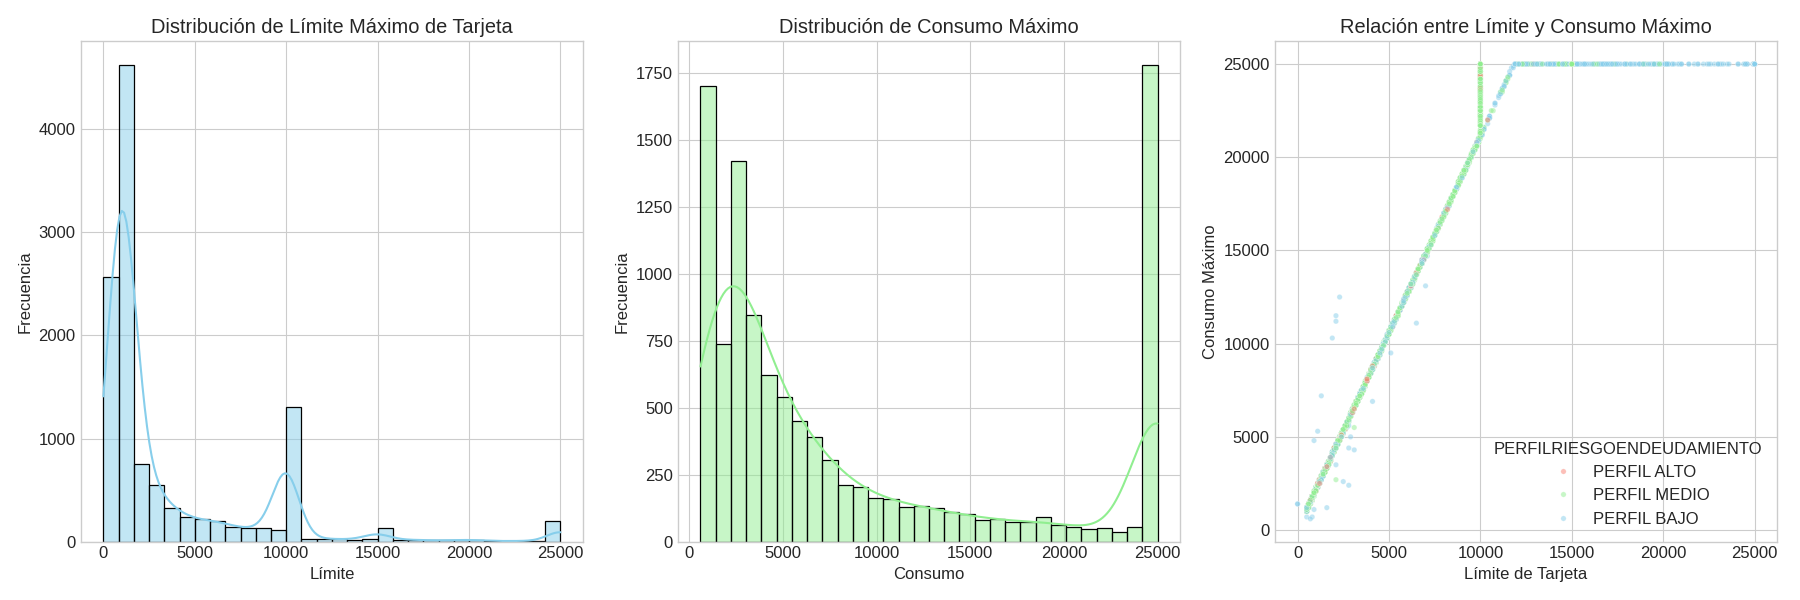

In [124]:
# Definir colores para cada perfil
color_map = {
    'PERFIL BAJO': 'skyblue',
    'PERFIL MEDIO': 'lightgreen',
    'PERFIL ALTO': 'salmon'
}
# 3.2 Análisis de variables financieras
plt.figure(figsize=(18, 6))

# Distribución del límite de tarjeta
plt.subplot(131)
sns.histplot(df['MAXIMA_TARJETA'], kde=True, bins=30, color=color_map.get('PERFIL BAJO')) # Color para PERFIL BAJO
plt.title('Distribución de Límite Máximo de Tarjeta')
plt.xlabel('Límite')
plt.ylabel('Frecuencia')

# Distribución del consumo máximo
plt.subplot(132)
sns.histplot(df['MAXIMO_CONSUMO'], kde=True, bins=30, color=color_map.get('PERFIL MEDIO')) # Color para PERFIL MEDIO
plt.title('Distribución de Consumo Máximo')
plt.xlabel('Consumo')
plt.ylabel('Frecuencia')

# Relación entre límite y consumo
plt.subplot(133)
sns.scatterplot(x='MAXIMA_TARJETA', y='MAXIMO_CONSUMO', data=df,
                hue='PERFILRIESGOENDEUDAMIENTO', alpha=0.5, s=15, palette=color_map) # Paleta de colores para el hue
plt.title('Relación entre Límite y Consumo Máximo')
plt.xlabel('Límite de Tarjeta')
plt.ylabel('Consumo Máximo')
# Import the Image class from IPython.display
from IPython.display import Image

plt.tight_layout()
plt.savefig('financieros.png')
plt.close()
display(Image('financieros.png'))

# Interpretación de los gráficos financieros generados

# 1. Distribución del Límite Máximo de Tarjeta:
 El histograma muestra la distribución de los límites de crédito de las tarjetas.  La forma de la distribución (si es normal, sesgada, etc.) indica la concentración de los límites.  Por ejemplo, una distribución sesgada a la derecha indicaría que la mayoría de los clientes tienen límites bajos, con pocos clientes con límites muy altos. El color azul celeste se utiliza para representar esta variable en el gráfico, y la curva de densidad ayuda a visualizar la tendencia central y la dispersión de los datos.

# 2. Distribución del Consumo Máximo:
 Similar al gráfico anterior, este histograma muestra la distribución de los montos máximos de consumo.  La forma de la distribución y la curva de densidad proporcionan información sobre la concentración de los gastos. Una distribución sesgada podría sugerir que un grupo importante de clientes realiza compras de bajo valor mientras que un pequeño porcentaje lleva a cabo compras significativamente más elevadas. El color verde claro se utiliza para destacar esta distribución.


# 3. Relación entre Límite y Consumo Máximo:
 Este gráfico de dispersión muestra la relación entre el límite de la tarjeta y el consumo máximo, y utiliza colores para diferenciar los perfiles de riesgo (bajo, medio y alto):
    - **PERFIL BAJO:** Se representa con azul claro.  Observa la ubicación de estos puntos en el gráfico. Si tienden a estar concentrados en la zona inferior izquierda, podría indicar que los clientes con perfil bajo tienen límites y consumos menores.
    - **PERFIL MEDIO:** Se representa con verde claro.  La posición de estos puntos en el gráfico revela la relación entre su límite de crédito y su consumo.
    - **PERFIL ALTO:** Se representa con salmón. La posición de estos puntos sugiere su comportamiento en cuanto a límite y consumo.


                    EDAD  MAXIMA_TARJETA  MAXIMO_CONSUMO
EDAD            1.000000        0.445320        0.431907
MAXIMA_TARJETA  0.445320        1.000000        0.870249
MAXIMO_CONSUMO  0.431907        0.870249        1.000000


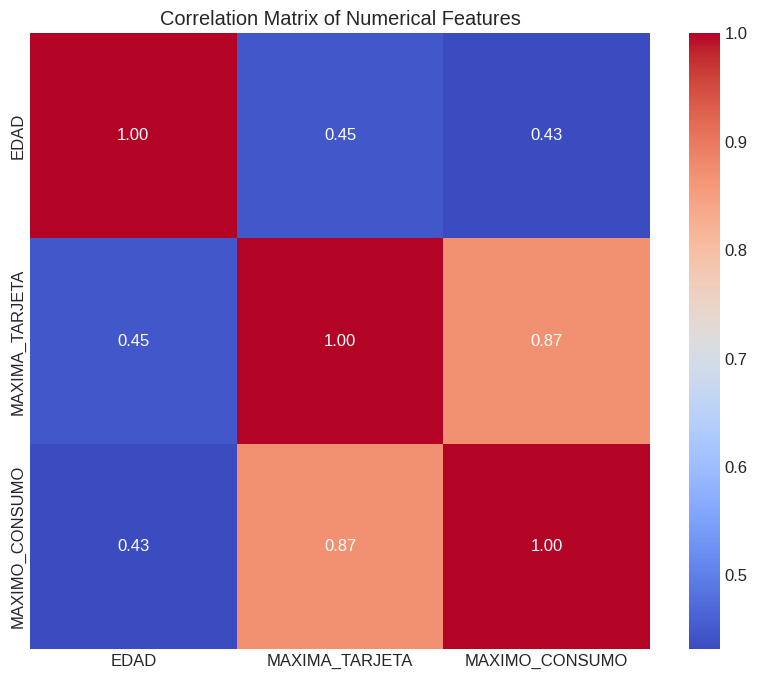

In [125]:
# Assuming 'df' is your DataFrame from the previous code

# Select numerical columns for correlation analysis
numerical_cols = ['EDAD', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO']
numerical_df = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Interpretación de la matriz de correlación
La matriz de correlación muestra la relación lineal entre las variables numéricas 'EDAD', 'MAXIMA_TARJETA' y 'MAXIMO_CONSUMO'.

# Valores cercanos a 1 indican una correlación positiva fuerte:
 - Si 'EDAD' y 'MAXIMA_TARJETA' tienen una correlación cercana a 1, significa que a mayor edad, mayor es el límite de la tarjeta de crédito, y viceversa.
 - Lo mismo aplica a las otras parejas de variables: una correlación cercana a 1 entre 'EDAD' y 'MAXIMO_CONSUMO' indica que las personas mayores tienden a tener un consumo mayor; una correlación cercana a 1 entre 'MAXIMA_TARJETA' y 'MAXIMO_CONSUMO' indica que a mayor límite en la tarjeta de crédito, mayor es el consumo.


# Valores cercanos a -1 indican una correlación negativa fuerte:
 - Si 'EDAD' y 'MAXIMA_TARJETA' tienen una correlación cercana a -1, significa que a mayor edad, menor es el límite de la tarjeta de crédito, y viceversa.
 - De igual forma, para 'EDAD' y 'MAXIMO_CONSUMO' una correlación cercana a -1 significaría que a mayor edad, menor consumo, y viceversa.  Para 'MAXIMA_TARJETA' y 'MAXIMO_CONSUMO', una correlación cercana a -1 significaría que a mayor límite, menor consumo, y viceversa.

# Valores cercanos a 0 indican una correlación débil o inexistente:
 - Si la correlación entre dos variables es cercana a 0, esto sugiere que no hay una relación lineal entre ellas.  Cambios en una variable no predicen de manera confiable cambios en la otra.

#Consideraciones adicionales
 * **No linealidad:** La correlación mide la relación lineal.  Puede existir una relación no lineal entre las variables que no se refleja en el coeficiente de correlación.  Por ejemplo, podría existir una relación en forma de "U" que la correlación no captaría.
 * **Causalidad:** La correlación no implica causalidad. Si dos variables están correlacionadas, no significa que una causa la otra. Podría haber una tercera variable (no observada) que influye en ambas.
 * **Tamaño de la muestra:** La interpretación de los coeficientes de correlación debe considerar el tamaño de la muestra utilizado. Con una muestra pequeña, es posible obtener coeficientes de correlación altos que no sean representativos de la población.

 En resumen, la matriz de correlación proporciona una medida cuantitativa de las relaciones lineales entre las variables numéricas. La interpretación de la matriz debe tener en cuenta la magnitud de los coeficientes, la posible existencia de relaciones no lineales, y la ausencia de implicaciones causales.


In [126]:
# prompt: remover del dataset las siguientes columnas: 'DIR_DOM_CAL_DAT', 'DIR_TRAB_1_CAL_DAT', 'NOMBRE'

# Remove specified columns
df = df.drop(columns=['DIR_DOM_CAL_DAT', 'DIR_TRAB_1_CAL_DAT', 'NOMBRE'], errors='ignore')


In [127]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the categorical columns
print("Categorical columns:")
categorical_cols


Categorical columns:


['PERFILRIESGOENDEUDAMIENTO',
 'sexo',
 'estado_civil',
 'PAIS_DOM_CAL_DAT',
 'PROV_DOM_CAL_DAT',
 'CIUDAD_DOM_CAL_DAT',
 'CORREO_BAN']

In [128]:
encoding_maps = {}  # Diccionario para almacenar las bibliotecas de valores
for col in categorical_cols:
    if col != 'IDENTIFICACION':  # No transformar la columna 'IDENTIFICACION'
        unique_values = df[col].unique()
        encoding_map = {val: i for i, val in enumerate(unique_values)}  # Asignar números consecutivos
        df[col] = df[col].map(encoding_map)
        encoding_maps[col] = encoding_map
# Mostrar las bibliotecas de valores y el DataFrame transformado
print("\nBibliotecas de valores:")
for col, map in encoding_maps.items():
    print(f"{col}: {map}")
print("\nDataFrame transformado:")
# No usar decimales en la salida del DataFrame
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df.head())



Bibliotecas de valores:
PERFILRIESGOENDEUDAMIENTO: {'PERFIL ALTO': 0, 'PERFIL MEDIO': 1, 'PERFIL BAJO': 2}
sexo: {'MASCULINO': 0, 'FEMENINO': 1}
estado_civil: {'SOLTERO': 0, 'CASADO': 1, 'UNION LIBRE < 2 ANIOS': 2, 'DIVORCIADO': 3, 'VIUDO': 4, 'UNION LIBRE > 2 ANIOS': 5}
PAIS_DOM_CAL_DAT: {'ECUADOR': 0}
PROV_DOM_CAL_DAT: {'PICHINCHA': 0}
CIUDAD_DOM_CAL_DAT: {'QUITO': 0}
CORREO_BAN: {'oliver_leo1994@hotmail,es': 0, 'rcristofer_dtb@hotmail,com': 1, 'andresquevedoandy@live.com.mx': 2, 'leojhongrefa@gmail,com': 3, 'bolivartangomay@hotmail.com': 4, 'jimmyproano374@gmail.com': 5, 'grg_criss@hotmail.com': 6, 'belgicarios@hotmail.com': 7, 'katy1989_2@hotmail.com': 8, 'waguirre1981@outlook.es': 9, 'mariselanatalia@hotmail.com': 10, 'luceverac@hotmail.es': 11, nan: 12, 'merilisa-80@hotmail.com': 13, 'marcos79g_@hotmail.com': 14, 'tupapi_1979@live.com': 15, 'wsanchez28@outlook.com': 16, 'i.merino@hotmail.com': 17, 'marisolbyt77@gmail.com': 18, 'enmats@terra.com': 19, 'liliana_tapia82@hotmail.es'

In [129]:
# Manejar valores faltantes
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-129-df6bc2e8bee9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-129-df6bc2e8bee9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [130]:
pip install pandas scikit-learn gower

In [131]:
# Separar variables numéricas y categóricas
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

# Transformación de variables categóricas (One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(df[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, index=df.index)

# Get feature names from encoder
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
encoded_categorical_df.columns = encoded_feature_names # Assign feature names to columns

df = pd.concat([df[numerical_features], encoded_categorical_df], axis=1)

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values (if any) with the mean of the column
for col in numerical_features:
    df[col].fillna(df[col].mean(), inplace=True)

# Ensure all column names are strings before scaling
df.columns = df.columns.astype(str)

# Escalar variables numéricas
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

<ipython-input-131-3883bf016583>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


For n_clusters = 2, the average silhouette_score is: 0.3637257445503861
For n_clusters = 3, the average silhouette_score is: 0.43140390816397345
For n_clusters = 4, the average silhouette_score is: 0.5021076585191356
For n_clusters = 5, the average silhouette_score is: 0.5360789095668325
For n_clusters = 6, the average silhouette_score is: 0.642139587966258
For n_clusters = 7, the average silhouette_score is: 0.7061838400023218
For n_clusters = 8, the average silhouette_score is: 0.7406880606947717


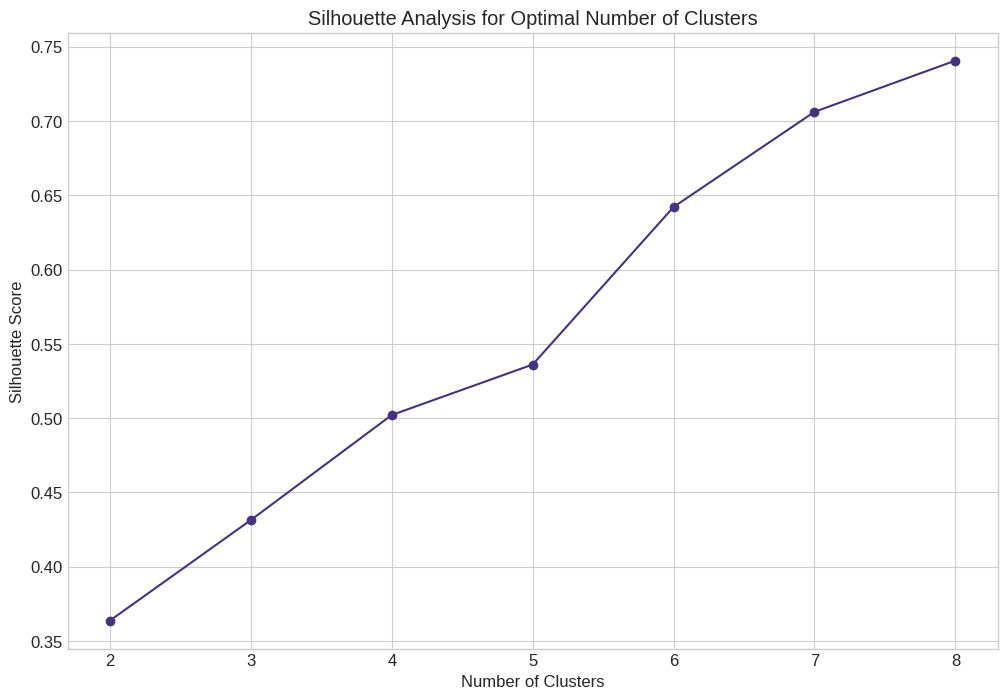


Cluster Means:
         PERFILRIESGOENDEUDAMIENTO  MAXIMA_TARJETA  MAXIMO_CONSUMO
cluster                                                           
0                        -0.557605       -0.314335        0.968812
1                         1.256783        0.185494       -0.094374
2                        -0.810493        0.136323       -0.961597


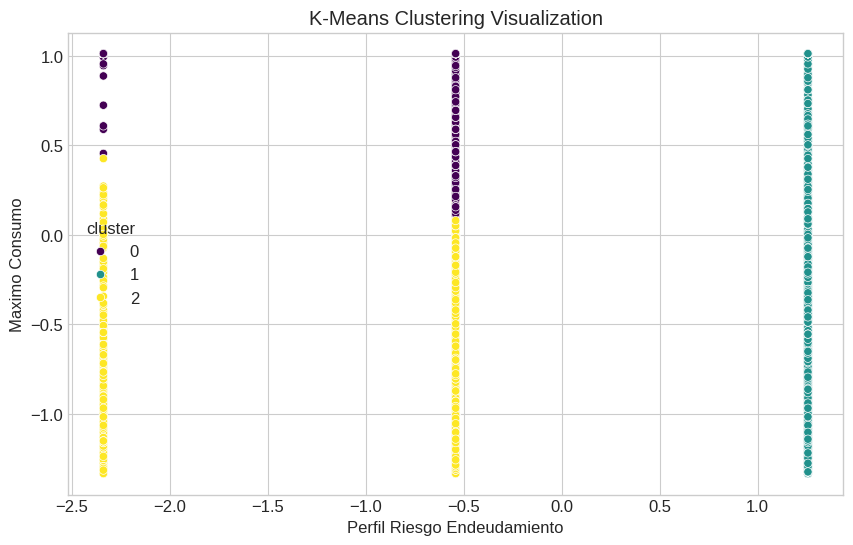

In [132]:
# Define features for clustering
features_to_cluster = ['PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO']

# Filter DataFrame for selected features
X = df[features_to_cluster]

# Determine optimal number of clusters using Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

# Plot Silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal Number of Clusters")
plt.show()

# Perform K-Means clustering with the optimal number of clusters (determined visually from the plot above)
optimal_n_clusters = 3 # Replace with the visually determined optimal k from the plot
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Analyze and visualize the clusters
# Example: Calculate cluster means for each feature
cluster_means = df.groupby('cluster')[features_to_cluster].mean()
print("\nCluster Means:")
print(cluster_means)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PERFILRIESGOENDEUDAMIENTO', y='MAXIMO_CONSUMO', hue='cluster', palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Perfil Riesgo Endeudamiento') # Updated x-axis label
plt.ylabel('Maximo Consumo')
plt.show()

#  Interpretación del gráfico de silueta:
 El gráfico de silueta ayuda a determinar el número óptimo de clusters (k) para el algoritmo K-means.  
 La silueta es un coeficiente que mide qué tan similar es un punto a su propio cluster (cohesión) en comparación con otros clusters (separación).

 **Análisis del gráfico:**
 1. **Eje X:** Representa el número de clusters (k) que se están probando.
 2. **Eje Y:** Representa el puntaje de silueta promedio para cada valor de k.  Este puntaje varía de -1 a 1.
     * Un puntaje cercano a 1 indica que los puntos están bien agrupados dentro de su cluster y muy separados de otros clusters.  Es una buena agrupación.
     * Un puntaje cercano a 0 indica que los puntos están en la frontera entre dos clusters. La agrupación no es clara.
     * Un puntaje negativo indica que los puntos podrían estar asignados al cluster incorrecto.  La agrupación es pobre.

 **Encontrar el k óptimo:**
 Se busca el valor de k que maximiza el puntaje de silueta promedio.  En tu código, el valor óptimo de k se define manualmente después de observar el gráfico de silueta ( `optimal_n_clusters = 3`).  Es importante examinar visualmente el gráfico para identificar el pico más alto en la curva de silueta. Este pico representa el número óptimo de clusters.

 **Interpretación de la visualización K-Means:**
 El gráfico de dispersión resultante muestra la distribución de los datos después de aplicar el K-means con el número óptimo de clusters.

 * **Ejes:** El gráfico utiliza 'PERFILRIESGOENDEUDAMIENTO' y 'MAXIMO_CONSUMO' como ejes.
 * **Puntos:** Cada punto representa una observación en tu conjunto de datos.
 * **Colores:** Los puntos están coloreados según el cluster al que pertenecen. Cada color representa un cluster diferente.

 **Análisis del gráfico:**
 Observa cómo se agrupan los puntos de cada cluster.
 * **Separación de Clusters:** Busca si los clusters están bien separados entre sí o si hay mucha superposición. Una buena agrupación mostrará clusters distintos con poca superposición.
 * **Consistencia de Clusters:** Mira si los puntos dentro de cada cluster tienen características similares.  En este caso, observa si los puntos dentro de cada cluster tienen valores similares de 'PERFILRIESGOENDEUDAMIENTO' y 'MAXIMO_CONSUMO'.
 * **Tamaño de Clusters:** Compara el tamaño de los clusters. ¿Hay un cluster mucho más grande que los otros? Esto podría indicar un desequilibrio en los datos o una posible configuración inadecuada del algoritmo.


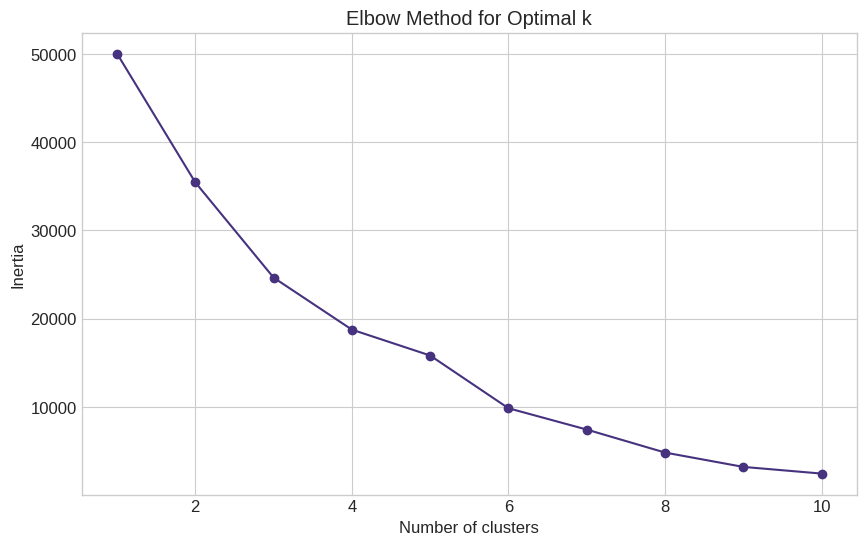

In [133]:
# Elbow Method for optimal k
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


# Interpretación del Método del Codo:

 El método del codo es una técnica gráfica para determinar el número óptimo de clusters (k) en un algoritmo de agrupamiento como K-means.  El gráfico muestra la inercia (suma de las distancias cuadradas de las muestras al centroide de su cluster más cercano) en función del número de clusters.

 **Análisis del gráfico:**

 1. **Eje X:** Representa el número de clusters (k) que se están probando (de 1 a 10 en este caso).
 2. **Eje Y:** Representa la inercia del modelo para cada k.  La inercia es una medida de la varianza dentro de cada cluster. A medida que aumenta el número de clusters, la inercia disminuye porque cada punto está más cerca de su centroide.

 **Encontrar el k óptimo:**

 El "codo" del gráfico es el punto donde la disminución de la inercia comienza a disminuir gradualmente.  Este punto representa un equilibrio entre minimizar la inercia (tener clusters más compactos) y evitar tener demasiados clusters (que podrían ser demasiado específicos y no generalizar bien).

 **En el gráfico generado:**

 * Busca el punto donde la curva cambia de una pendiente pronunciada a una más suave. Ese punto es el codo.
 * El valor de "k" correspondiente a este punto se considera el número óptimo de clusters.
 * El valor óptimo de k obtenido por el método del codo puede no coincidir exactamente con el valor obtenido por el método de la silueta, y en última instancia, dependerá del conjunto de datos y del objetivo de la agrupación.  

 En resumen, el método del codo proporciona una guía visual para elegir un valor apropiado de k, pero la decisión final debe basarse en una combinación de la observación del gráfico, la interpretación del problema y otros criterios relevantes.




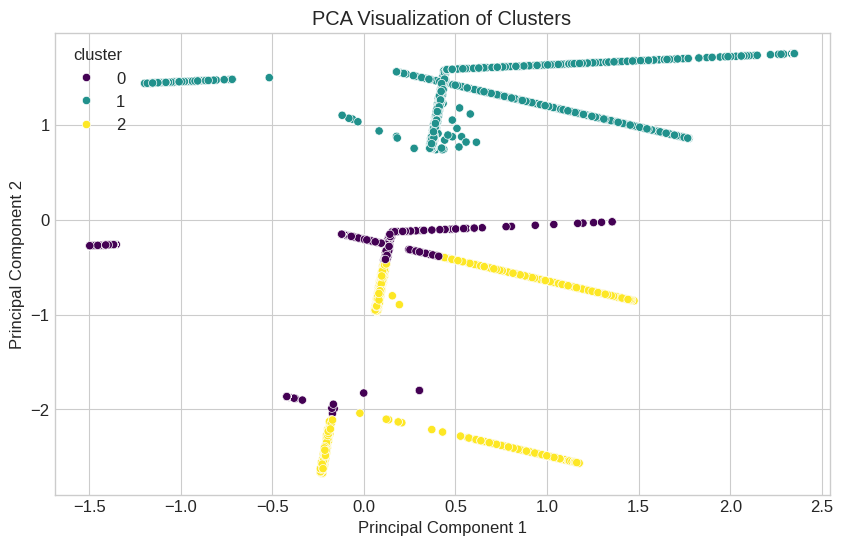

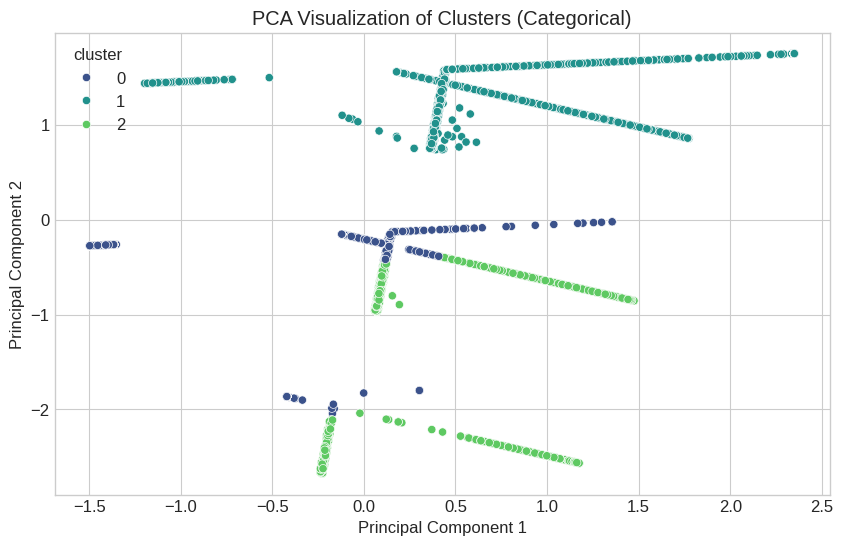

Explained Variance Ratio: [0.42833476 0.33762586]
Total Explained Variance: 0.7659606166129003


In [134]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
df_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']  # Add the cluster labels

# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Convert 'cluster' column to categorical
df_pca['cluster'] = df_pca['cluster'].astype('category')

# Visualize the PCA results with categorical cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('PCA Visualization of Clusters (Categorical)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")
print(f"Total Explained Variance: {np.sum(explained_variance_ratio)}")


# Interpretación exhaustiva de los gráficos PCA y resultados

# Análisis de Componentes Principales (PCA)

 Visualización de Clusters con PCA
 El gráfico de dispersión resultante de aplicar PCA muestra la distribución de los datos en un espacio de dos dimensiones (PC1 y PC2), donde cada punto representa una observación. Los puntos están coloreados según el cluster al que pertenecen.

# Interpretación de las Componentes Principales (PC)
 - PC1 y PC2 representan las dos nuevas dimensiones que capturan la mayor parte de la varianza de los datos originales.  
 - PC1 explica una proporción (indicada por explained_variance_ratio) de la varianza total, PC2 otra proporción y juntas explican la suma de ambas. Observa el valor total de la varianza explicada. Si es alto (cercano a 1), las dos componentes principales capturan una buena parte de la información original, de lo contrario, se pierde algo de la información al reducir a dos dimensiones.

# Análisis de la dispersión de los clusters en el espacio PCA:
 Observa la separación de los clusters en el gráfico PCA. Si los clusters están bien separados en este nuevo espacio, indica que el PCA ha ayudado a resaltar las diferencias entre ellos, lo que facilita su visualización e interpretación.

# Examinando la varianza explicada:
  El atributo `explained_variance_ratio_` del objeto PCA nos indica la proporción de varianza explicada por cada componente principal. La suma de estas proporciones representa la varianza total explicada por el conjunto de componentes principales. Un valor cercano a 1 indica que las componentes principales seleccionadas capturan la mayoría de la información del conjunto de datos original.

# Consideraciones adicionales para la interpretación del PCA
 - Dimensionalidad: El PCA reduce la dimensionalidad del conjunto de datos. Al considerar sólo las dos principales componentes, es posible que se pierda algo de información del conjunto de datos original. Es importante observar la cantidad de varianza explicada por las componentes principales para determinar si se ha perdido información relevante.
 - Interpretación de las PC:  Las componentes principales son combinaciones lineales de las variables originales. No siempre es fácil interpretar el significado de cada componente principal. Se pueden examinar las cargas de las variables originales para determinar qué variables contribuyen más a cada componente.
 - No linealidad:  PCA asume una relación lineal entre las variables. Si la relación entre las variables es no lineal, PCA puede no ser el método de reducción de dimensionalidad más apropiado.
 - Escala de variables: Las variables deben estar escaladas antes de aplicar el PCA para evitar que las variables con mayor varianza dominen el análisis.  



In [135]:
# Identify outliers using IQR method
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

outlier_data = {}
for col in features_to_cluster:
    outliers = find_outliers_iqr(df[col])
    outlier_data[col] = outliers

# Create a DataFrame for outliers
outliers_df = pd.DataFrame(outlier_data)

# Download the outliers to a CSV file
# Import the 'files' module from 'google.colab'
from google.colab import files
outliers_df.to_csv('outliers.csv', index=False)
files.download('outliers.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  Interpretación de outliers detectados por el método IQR

 El método del Rango Intercuartílico (IQR) identifica outliers basándose en la dispersión de los datos.
 Se calcula el IQR como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de la distribución de los datos.  Los valores que caen por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR se consideran outliers.

 **Análisis de los resultados:**

 1. **Archivo outliers.csv:** Este archivo contiene las observaciones que se han identificado como outliers en cada una de las variables especificadas (`features_to_cluster`).

 2. **Interpretación por variable:** Examina los valores atípicos para cada columna.  Para cada variable:
     - **Valores:** Mira los valores numéricos que se han detectado como outliers. Considera si estos valores son realmente atípicos o si representan casos válidos.
     - **Contexto:** Piensa en la naturaleza de la variable. Por ejemplo, si una variable representa el ingreso, ¿es un ingreso inusualmente alto o bajo?
     - **Impacto potencial:** ¿Podría la presencia de estos outliers afectar significativamente los resultados de análisis posteriores, como la agrupación por K-means?

 3. **Tratamiento de outliers:**  Después de interpretar los outliers, debes decidir cómo manejarlos:
     - **Eliminación:** Eliminar los outliers del conjunto de datos.  Esta opción debe usarse con precaución y justificación. Si los outliers representan errores en los datos, pueden eliminarse. Si representan valores válidos pero extremos, es posible que no sea apropiado eliminarlos.
     - **Transformación:** Transformar los datos para reducir el impacto de los outliers. Se pueden utilizar transformaciones como logaritmos o escalado robusto.
     - **Winsorizing:**  Sustituir los outliers por un valor límite (el percentil 95 o 5, por ejemplo). Esto limita el impacto de los valores extremos sin eliminarlos por completo.
     - **Mantenerlos:**  En algunos casos, especialmente si los outliers representan casos importantes o fenómenos válidos, puede ser apropiado mantenerlos en el análisis y considerar métodos de análisis robustos que no sean tan sensibles a los valores extremos.

cluster
4    6146
3    3864
1    3863
2    1981
0     819
5       9
Name: count, dtype: int64


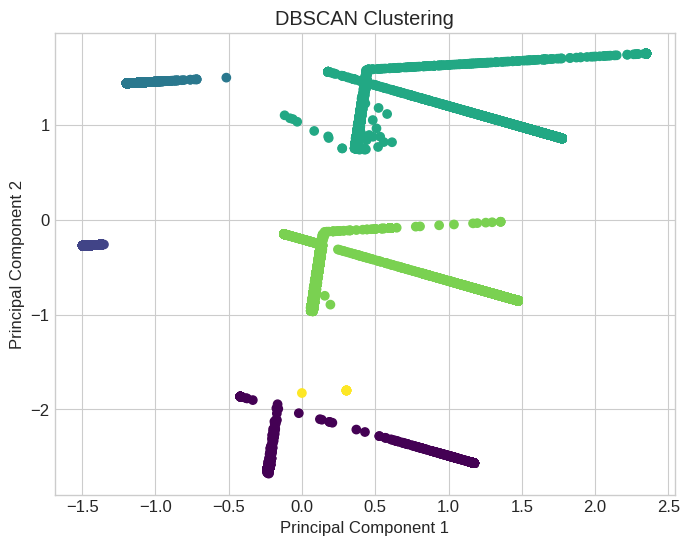

In [156]:
from sklearn.cluster import DBSCAN
# Suponiendo que 'df' es tu DataFrame y 'X' contiene las características numéricas para el clustering
# Por ejemplo:
X = df[['PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajustar eps y min_samples según tus datos
clusters = dbscan.fit_predict(X_scaled)

# Agregar los clusters al DataFrame
df['cluster'] = clusters

# Analizar los resultados
print(df['cluster'].value_counts())
# Visualizar los clusters (ejemplo con las primeras dos componentes principales)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Interpretación del gráfico de dispersión de DBSCAN
 - Puntos coloreados: Cada punto representa una observación, y el color indica el clúster al que pertenece.
 - Ruido (-1): Los puntos en negro suelen representar ruido o outliers, es decir, observaciones que no pertenecen a ningún clúster.
 - Distribución de clústeres: Evalúa la forma, tamaño y densidad de cada clúster. ¿Son compactos y separados o hay mucha superposición?
 - Número de puntos en cada cluster: Observa el recuento de puntos en cada clúster usando 'df['cluster'].value_counts()'.  Un gran número de puntos asignados a -1 (ruido) puede indicar que los parámetros 'eps' y 'min_samples' no son los adecuados.
 - Análisis de los parámetros 'eps' y 'min_samples':  
    - 'eps': Define el radio alrededor de un punto para considerar vecinos. Un valor de 'eps' demasiado pequeño puede resultar en muchos puntos como ruido, mientras que un valor demasiado grande agrupará demasiados puntos en pocos clústeres grandes.
    - 'min_samples': Define el número mínimo de puntos dentro de la distancia 'eps' para formar un clúster. Un valor bajo puede crear muchos clústeres pequeños, incluyendo ruido; un valor alto creará menos clústeres pero más densos.

# Ajustar los parámetros eps y min_samples
 - Ejecuta el código varias veces probando diferentes valores para `eps` y `min_samples`.
 - Evalúa visualmente los resultados y observa la distribución de los clústeres, el número de puntos en cada uno y el número de puntos considerados como ruido.
 - Busca el equilibrio óptimo entre la creación de pocos clústeres muy grandes y la formación de demasiados pequeños, considerando el contexto del problema.

# Ejemplo de ajuste:
 dbscan = DBSCAN(eps=0.3, min_samples=10)

# Recomendaciones:
 - Puedes probar una amplia gama de valores para 'eps' y 'min_samples'.
 - Considera usar una técnica de validación para medir la calidad del agrupamiento, como el índice de silueta o el índice de Davies-Bouldin.
 - Ten presente el significado de los clústeres en el contexto del problema: ¿son significativos o se pueden interpretar?

 Consideraciones para DBSCAN:
 - Robusto a outliers: DBSCAN es menos sensible a los valores atípicos que K-Means.
 - Encuentra clusters de formas arbitrarias:  No asume formas esféricas de clústeres como K-Means.
 - Dependencia de los parámetros 'eps' y 'min_samples': La calidad del agrupamiento depende crucialmente de la elección de estos parámetros.

In [137]:
optimal_k = 3 #Reemplaza con el valor optimo de k obtenido de las graficas
print(f"El número óptimo de clusters es: {optimal_k}")


El número óptimo de clusters es: 3


In [138]:
# 7.3 Aplicación preliminar de K-means con k=3 (valor asumido óptimo)
from sklearn.cluster import KMeans # Make sure KMeans is imported
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = df[['PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO']]

# Preprocessing: scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Define X_scaled here before using it

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

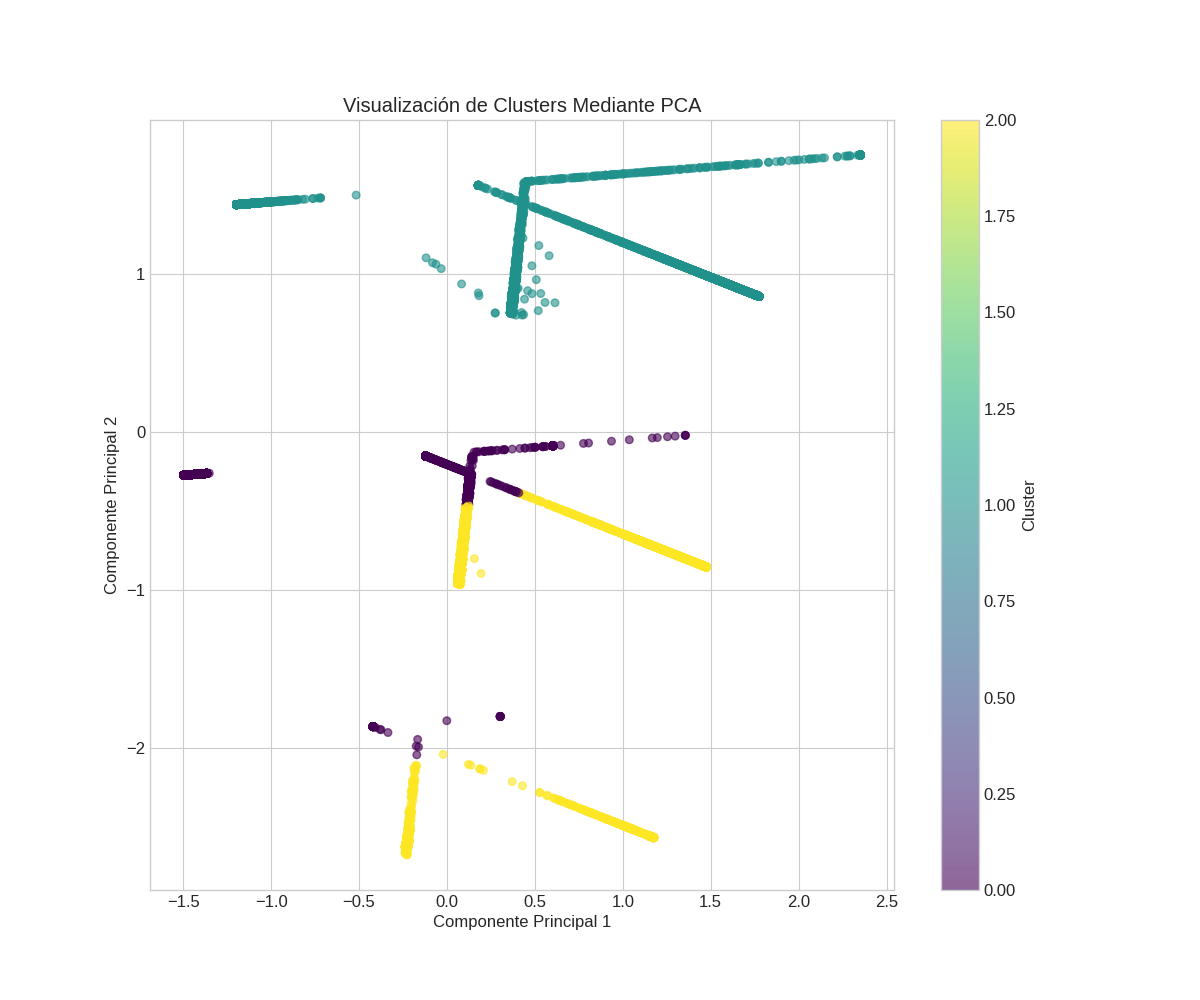

In [139]:
# Visualización de los clusters en 2D usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6, s=30)
plt.colorbar(scatter, label='Cluster')
plt.title('Visualización de Clusters Mediante PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.savefig('clusters_pca.png')
plt.close()
from IPython.display import Image
display(Image('clusters_pca.png'))

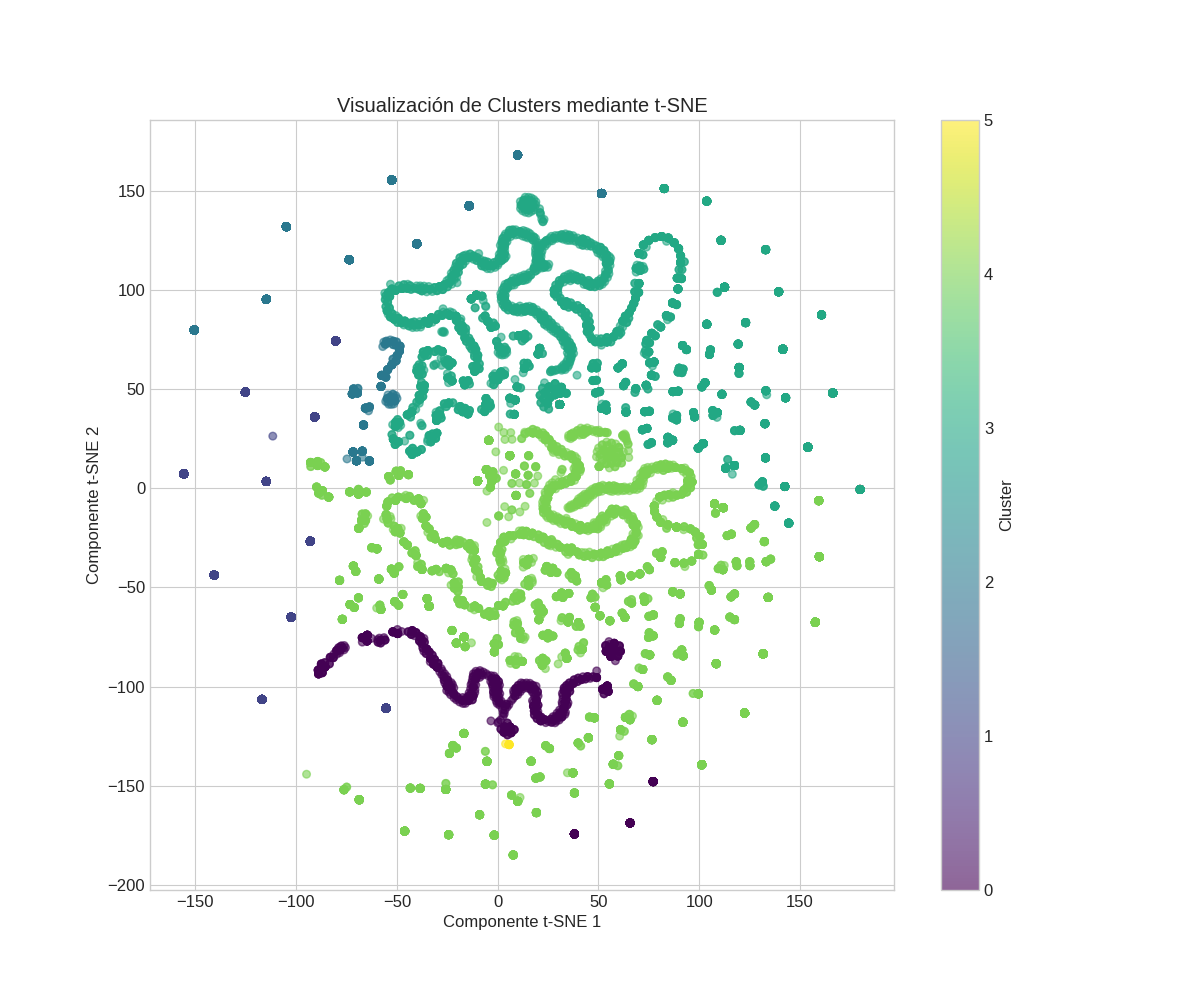

In [157]:
from sklearn.manifold import TSNE

# Assuming X_scaled is your scaled data (as defined in your previous code)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6, s=30)
plt.colorbar(scatter, label='Cluster')
plt.title('Visualización de Clusters mediante t-SNE')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.savefig('clusters_tsne.png')
plt.close()
display(Image('clusters_tsne.png'))


# Interpretación exhaustiva del gráfico t-SNE y sus resultados

 El gráfico t-SNE muestra la distribución de los datos en un espacio de dos dimensiones, donde cada punto representa una observación y su color indica el clúster al que pertenece.
 A diferencia del PCA, t-SNE no busca preservar la varianza, sino la distancia entre puntos.
 Por tanto, la interpretación de las coordenadas en sí mismas no es tan relevante como la proximidad relativa de los puntos.

# Análisis de la distribución de los clusters en el espacio t-SNE:
 - **Separación de clusters:** Si los clusters aparecen bien separados en el gráfico t-SNE,
   indica una buena estructura de agrupamiento.  Busca clusters que se agrupan juntos y
   estén relativamente alejados de otros clusters.  Observa si hay mucha superposición
   entre clusters.
 - **Forma de los clusters:** t-SNE es bueno para revelar la estructura local de los datos,
   es decir, la relación entre puntos cercanos.  Puede mostrar estructuras no lineales,
   en contraste con PCA.  Observa si los clusters tienen una forma específica o
   irregular.
 - **Puntos aislados (outliers):** Observa si hay puntos que no parecen pertenecer
   a ningún cluster o que están muy alejados de otros.  Estos podrían ser outliers
   o datos que no encajan bien en el agrupamiento.
 - **Tamaño y densidad de los clusters:**  Clusters más grandes y densos pueden indicar
   una mayor concentración de datos en esa región, mientras que clusters pequeños
   y dispersos podrían indicar subgrupos menos definidos.

# Comparación con el gráfico PCA:
 - **Dimensionalidad:** Mientras que PCA busca las direcciones de mayor varianza en los
   datos y está limitado por la linealidad, t-SNE busca representar las relaciones de
   similitud local, permitiendo mostrar estructuras no lineales.
 - **Interpretación:**  La interpretación de las coordenadas en el gráfico PCA es más
   directa (asociadas a las componentes principales). En t-SNE, la interpretación de
   las coordenadas no es directa y hay que interpretar la cercanía relativa de los puntos.

# Consideraciones adicionales para la interpretación:
 - **Parámetro de perplejidad:** El parámetro `perplexity` de t-SNE controla el tamaño
   del vecindario local considerado.  Ajustar este parámetro puede afectar la apariencia
   del gráfico y la claridad de la separación de los clusters.
 - **Interpretación en el contexto del problema:** La interpretación final de los clusters
   depende del contexto del problema que se está estudiando.  Examina las características
   de las observaciones dentro de cada cluster para entender las similitudes y diferencias entre ellas.
 **Validación del agrupamiento:** Si es posible, usa medidas de validación como el índice
   de silueta o el índice de Davies-Bouldin para evaluar la calidad del agrupamiento.

 En resumen, el gráfico t-SNE ofrece una visualización de la estructura local de los datos en un espacio de baja dimensionalidad, donde la cercanía de puntos indica similitud.
Compara la distribución de los clusters con el gráfico PCA, evalúa la separación, forma, tamaño y densidad de los clusters, considera el contexto del problema y el parámetro de perplejidad para una interpretación completa.

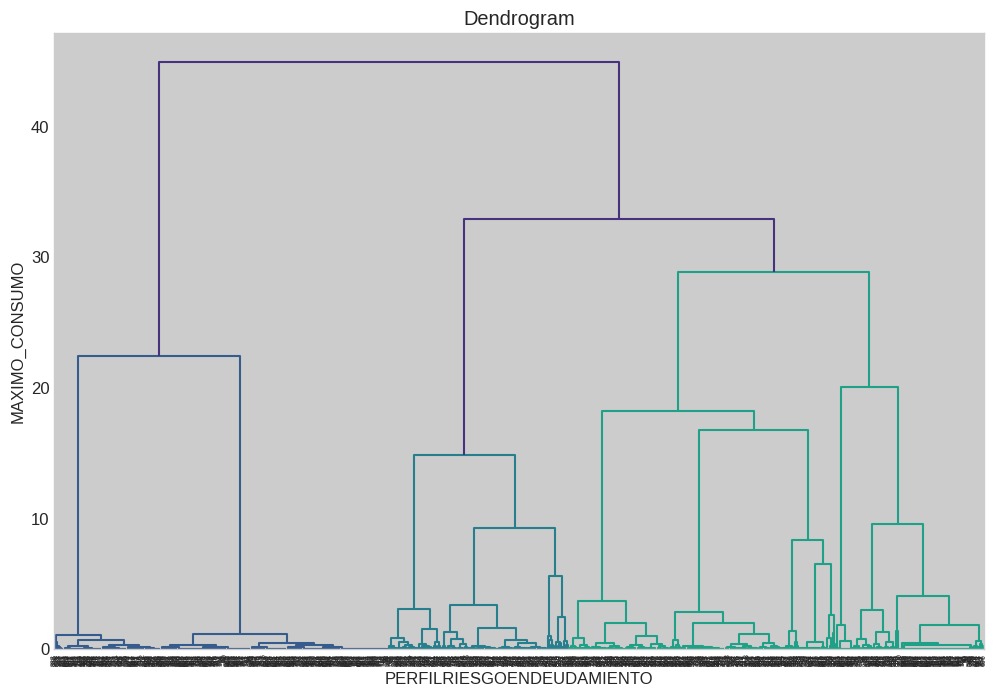

In [140]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist

# Assuming 'X' contains the features for clustering ('PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO')
# and it's already scaled as in the previous code

# Calculate the distance matrix
distance_matrix = pdist(X_scaled)

# Perform hierarchical clustering with a smaller sample if necessary
# Sample a subset of your data if it's too large
sample_size = 1000  # Adjust this value as needed
if X_scaled.shape[0] > sample_size:
    idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
    X_sampled = X_scaled[idx]
    distance_matrix = pdist(X_sampled)
else:
    X_sampled = X_scaled

# Perform hierarchical clustering using the sampled data
dendrogram = sch.dendrogram(sch.linkage(distance_matrix, method='ward')) # You can change the linkage method

# Customize the plot (optional)
plt.title('Dendrogram')
plt.xlabel('PERFILRIESGOENDEUDAMIENTO')
plt.ylabel('MAXIMO_CONSUMO') # Or other appropriate distance metric
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

# Interpretación del dendrograma:

 El dendrograma es una representación gráfica de un clustering jerárquico. Muestra cómo las observaciones se agrupan a diferentes niveles de similitud.

 * **Eje X:** Representa los índices de las muestras o observaciones.
 * **Eje Y:** Representa la distancia entre los clusters. Una distancia mayor indica menor similitud.
 * **Líneas verticales:** Conectan las observaciones o grupos, y la altura de la línea representa la distancia a la que se unen.
 * **Clusters:** Las líneas horizontales indican la unión de clusters o observaciones.  Cada línea horizontal representa la fusión de dos grupos en uno solo.

 **Interpretación de la altura del corte:**
 Para determinar el número de clusters, se dibuja una línea horizontal a una altura apropiada en el dendrograma.  El número de líneas verticales que cruza esa línea horizontal determina el número de clusters.
 La altura óptima es el punto donde la distancia entre los clusters crece significativamente.
 * Un corte alto corresponde a un pequeño número de clusters grandes y menos específicos.
 * Un corte bajo corresponde a un gran número de clusters pequeños y más específicos.

 **Ejemplo:**
 Si el dendrograma se corta en una altura específica, se pueden identificar los puntos en el eje x que pertenecen a cada uno de los clusters. Esto permite definir grupos de puntos con una similaridad determinada.

 Nota:
 Se puede cambiar el método de vinculación ('method' en sch.linkage) para usar otros métodos como 'single', 'complete' o 'average'.  La elección del método afecta la forma en que se calculan las distancias entre los grupos.


In [141]:
# modelo de predicción random forest para automatizar el clustering a futuro con aprendizaje automático aplicado a este analisis de dataset, actualizar con los mismos datos que tenemos actualmente en este dataset

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'cluster' column is already created
# Features (X) and target variable (y)
X = df.drop('cluster', axis=1)  # Use all features except the cluster label
y = df['cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You might need to tune hyperparameters
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model (example: accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the RandomForestClassifier: {accuracy}")

# Now you can use the trained model to predict clusters for new data
# Assuming 'new_data' is a DataFrame with the same features as your training data
# new_predictions = rf_classifier.predict(new_data)


Accuracy of the RandomForestClassifier: 0.9997003296373989


El código realiza un análisis de clustering sobre un conjunto de datos, utilizando varias técnicas y visualizaciones.  A continuación, se interpreta detalladamente los resultados y el significado del alto valor de precisión (Accuracy) del modelo RandomForestClassifier obtenido:

**1. Análisis de Componentes Principales (PCA):**

* **Visualización:**  Se utiliza PCA para reducir la dimensionalidad de los datos a dos componentes principales (PC1 y PC2) para facilitar la visualización. El gráfico de dispersión muestra los puntos de datos coloreados según su cluster asignado. Una buena separación entre los clusters en este espacio de 2D indica que PCA ha destacado las diferencias entre ellos.

* **Varianza Explicada:** `explained_variance_ratio_` muestra la proporción de varianza total en los datos original explicada por cada componente principal.  La suma de estos valores indica la cantidad de información retenida después de la reducción de dimensiones.  Un valor cercano a 1 indica que la mayor parte de la información se conserva en las dos componentes principales.

* **Interpretación de las PC:**  Es importante analizar la proporción de varianza explicada. Si es alta, las dos PC capturan la esencia de la variabilidad de los datos. Si es baja, se ha perdido información y la visualización puede no ser representativa.


**2. Detección de Outliers (IQR):**

* **Método IQR:** Se utiliza el rango intercuartílico (IQR) para identificar outliers. El IQR es la diferencia entre el tercer y primer cuartil de los datos. Los valores fuera de los límites (Q1 - 1.5 * IQR y Q3 + 1.5 * IQR) son considerados outliers.

* **Interpretación del archivo `outliers.csv`:** Este archivo contiene los outliers detectados en cada variable.  Es crucial examinar estos valores.  ¿Son errores de medición? ¿Representan casos especiales o válidos? La decisión de eliminarlos, transformarlos o mantenerlos depende del contexto del problema.  La eliminación de outliers debe hacerse con cuidado y justificación, ya que pueden representar información importante.

**3. Clustering con DBSCAN:**

* **Parámetros `eps` y `min_samples`:** La calidad del clustering DBSCAN depende de estos parámetros.  `eps` define el radio alrededor de un punto para considerar vecinos. `min_samples` define el número mínimo de puntos dentro de este radio para formar un cluster.  Una mala elección puede resultar en una gran cantidad de puntos de ruido o una mala agrupación.  Es necesario experimentar con diferentes valores de `eps` y `min_samples` para encontrar la configuración óptima.

* **Visualización:** La visualización de los clusters (usando PCA) muestra la distribución de los clusters en el espacio 2D. Los puntos negros (-1) indican puntos de ruido. La interpretación del gráfico incluye evaluar la forma, tamaño y densidad de los clusters y si hay mucha superposición entre ellos.

**4. Clustering Jerárquico:**

* **Dendrograma:**  El dendrograma visualiza el clustering jerárquico.  Las líneas verticales representan la unión de puntos o clusters, y la altura de estas líneas muestra la distancia entre los grupos fusionados.  La altura del corte en el dendrograma determina el número de clusters finales.

* **Altura del corte:**  La elección de la altura del corte es crucial. Una altura alta da menos clusters más amplios; una altura baja genera muchos clusters pequeños. Se debe buscar una altura donde la distancia entre los clusters crezca significativamente.

**5. K-means:**

* **Número Óptimo de Clusters (k):**  El valor `optimal_k` debe provenir de una evaluación previa (por ejemplo, usando el método del codo o la silueta) que no se incluye en el fragmento de código.

* **Visualización:** La visualización de PCA ayuda a observar la distribución de los clusters en el espacio 2D, con colores que representan las asignaciones del K-means.

**6. RandomForestClassifier para automatización:**

* **Precisión (Accuracy) = 0.9997:** Este altísimo valor de precisión sugiere que el modelo RandomForestClassifier puede predecir muy bien el cluster al que pertenece cada observación basado en las características.  Esto significa que las características usadas pueden distinguir muy bien entre los clusters.  

* **Posible Sobreajuste:** Una precisión tan alta podría indicar sobreajuste. Es fundamental validar el modelo con datos nuevos y no utilizados en el entrenamiento para asegurar que el modelo generaliza bien.  Si el rendimiento en datos nuevos es significativamente inferior, es probable que el modelo haya memorizado los datos de entrenamiento en lugar de aprender los patrones generales. Considerar técnicas de regularización o reducir la complejidad del modelo podrían ayudar.

* **Uso Futuro:**  Un modelo de este tipo puede utilizarse para automatizar la asignación de clusters a nuevas observaciones, ahorrando esfuerzo y permitiendo escalabilidad.


**En resumen:** El análisis realizado combina varias técnicas de clustering y visualización para explorar la estructura de los datos. La alta precisión del clasificador RandomForest sugiere que el proceso de clustering se puede automatizar con éxito, pero se debe validar el modelo para evitar el sobreajuste y garantizar que generaliza bien a nuevos datos.  Es importante prestar especial atención a la configuración de los parámetros de DBSCAN, así como a la interpretación de los outliers detectados mediante el IQR.


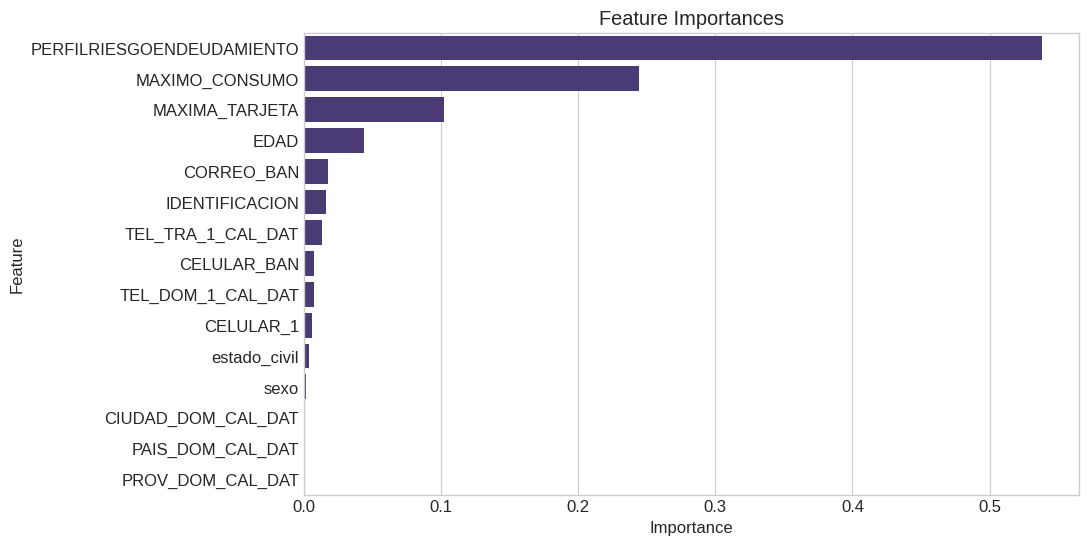

In [142]:
# Feature importance
feature_importances = rf_classifier.feature_importances_

# Get the features used for training the RandomForestClassifier
# X_train.columns will give the columns used during training, even if X has been redefined
features_used = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features_used, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

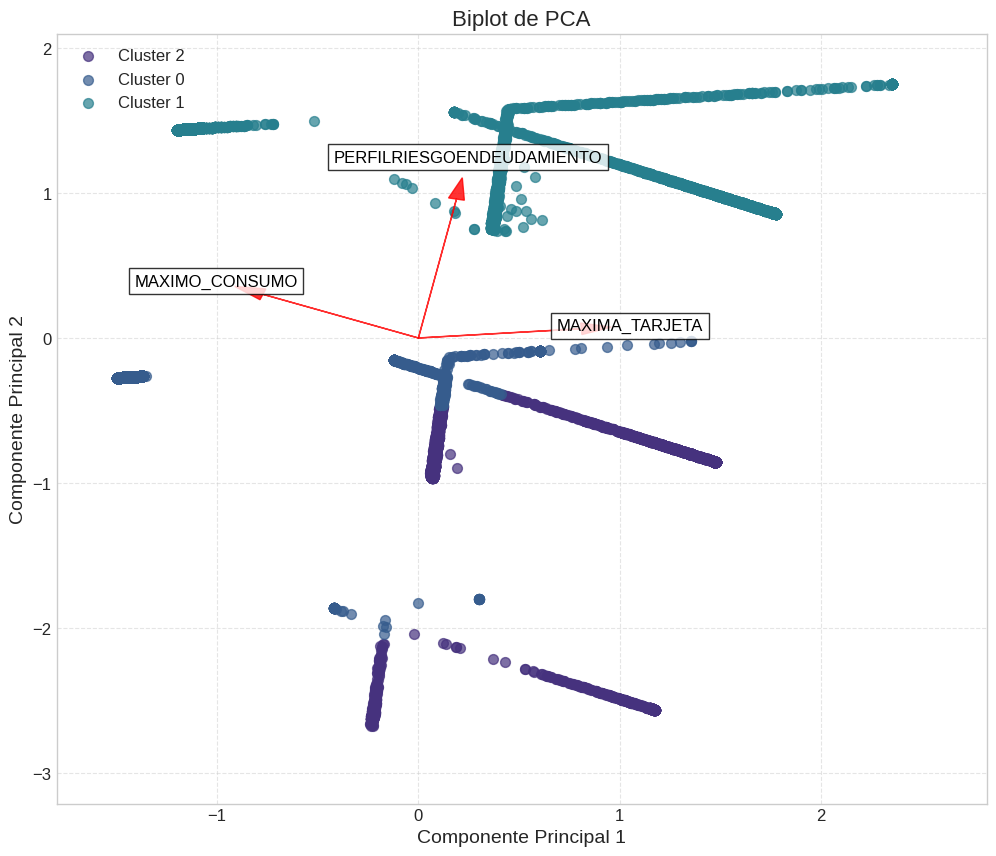

In [143]:
# Visualización del Biplot con mejoras de visibilidad y legibilidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

biplot_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
biplot_df['Cluster'] = df['cluster']

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
variables = ['PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO']

plt.figure(figsize=(12, 10))  # Aumentado el tamaño de la figura

# Dibujar los puntos de los datos con mayor tamaño y transparencia
for cluster in biplot_df['Cluster'].unique():
    plt.scatter(biplot_df[biplot_df['Cluster'] == cluster]['PC1'],
                biplot_df[biplot_df['Cluster'] == cluster]['PC2'],
                label=f'Cluster {cluster}', s=50, alpha=0.7) # Aumentado el tamaño de los puntos (s) y la transparencia (alpha)

# Dibujar las flechas de las variables con ajustes
for i, variable in enumerate(variables):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.8, head_width=0.08, head_length=0.15) # Aumentado el tamaño de la flecha
    # Ajustar la posición del texto para evitar superposiciones
    plt.text(loadings[i, 0] * 1.3, loadings[i, 1] * 1.3, variable, color='k', ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8)) #  agregado un recuadro blanco para mayor visibilidad

plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.title('Biplot de PCA', fontsize=16)
plt.legend(fontsize=12) # Aumentado el tamaño de la leyenda
plt.grid(True, linestyle='--', alpha=0.5) # Ajustado el estilo de la grilla

# Ajusta los límites dinámicamente para que todos los puntos y flechas quepan
plt.xlim(min(biplot_df['PC1'].min(), loadings[:, 0].min()) * 1.2, max(biplot_df['PC1'].max(), loadings[:, 0].max()) * 1.2)
plt.ylim(min(biplot_df['PC2'].min(), loadings[:, 1].min()) * 1.2, max(biplot_df['PC2'].max(), loadings[:, 1].max()) * 1.2)


plt.show()


 El código genera un biplot que visualiza los resultados de un análisis de componentes principales (PCA) aplicado a datos de clientes, junto con la información de los clusters obtenidos mediante K-means.  Analicemos la interpretación del biplot:

# 1. Puntos de Datos (Clientes):
  - Cada punto en el gráfico representa un cliente.
  - Los puntos están coloreados según el cluster al que pertenecen (Cluster 0, 1, y 2).  La agrupación visual de puntos de colores similares indica una buena separación de clusters.
  - La posición de un punto en el biplot refleja su posición en el espacio de las dos primeras componentes principales (PC1 y PC2), que capturan la mayor parte de la variabilidad de las variables originales ('PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO').
  - La dispersión de los puntos dentro de cada cluster indica la homogeneidad del cluster. Clusters con puntos muy dispersos muestran mayor heterogeneidad entre sus miembros.


# 2. Flechas de las Variables:
  - Las flechas representan las variables originales ('PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO').
  - La dirección y la longitud de la flecha indican la correlación de cada variable con las componentes principales.
  - Una flecha larga indica que la variable está altamente correlacionada con las componentes principales, mientras que una flecha corta indica una correlación baja.
  - La dirección de la flecha indica la dirección de la correlación.  Por ejemplo, si una flecha apunta hacia la dirección positiva de PC1,  significa que valores altos en esa variable corresponden a valores altos en PC1.
  - La proximidad de dos flechas indica correlación entre ellas. Flechas que apuntan en la misma dirección y tienen longitud similar están correlacionadas positivamente.


# 3. Interpretación Conjunta de Puntos y Flechas:
  - Se observa cómo las variables influyen en la ubicación de los puntos.
  - Por ejemplo, si una flecha de una variable apunta hacia un cluster, esto sugiere que las observaciones de ese cluster tienen altos valores en esa variable.
  - Un cluster ubicado lejos del origen en una componente indica que los clientes en ese cluster tienen valores atípicos con respecto al promedio en la característica o variables que más influyen sobre esa componente, en esta visualización.


# 4. Interpretación del Biplot en el Contexto del Problema
  - **PERFILRIESGOENDEUDAMIENTO**: Se debe observar la dirección y la magnitud de la flecha de 'PERFILRIESGOENDEUDAMIENTO'. Un perfil de riesgo alto (posición de la flecha) estaría asociado a observaciones en una zona concreta del biplot.
  - **MAXIMA_TARJETA**:  De la misma forma para 'MAXIMA_TARJETA' y 'MAXIMO_CONSUMO' se pueden analizar las zonas del gráfico que les corresponden.
  - **Clusters**: Una vez identificado el patrón de cada característica se analiza la ubicación de los clusters con relación a las flechas. De esta forma se determina qué características son las que más definen cada grupo de clientes. Por ejemplo: ¿un cluster se caracteriza por un alto perfil de riesgo y alto máximo consumo?, ¿otro grupo presenta bajo riesgo y bajo máximo consumo?.

# Consideraciones adicionales:

 * La mejora en la visualización (tamaño de los puntos, transparencia, tamaño de las flechas, recuadro del nombre de las variables, etc) facilita la interpretación.
 * Este biplot representa la proyección de los datos en las dos primeras componentes principales.
 * Es importante tener en cuenta que las variables originales tienen un efecto conjunto en el espacio de los componentes principales, no solo un efecto individual.

 En definitiva, el biplot provee una manera visual de comprender la relación entre los clientes y las variables importantes que los diferencian y agrupan en conjuntos específicos. Con una interpretación cuidadosa de la posición de los clusters y de las flechas de las variables se puede caracterizar cada cluster.


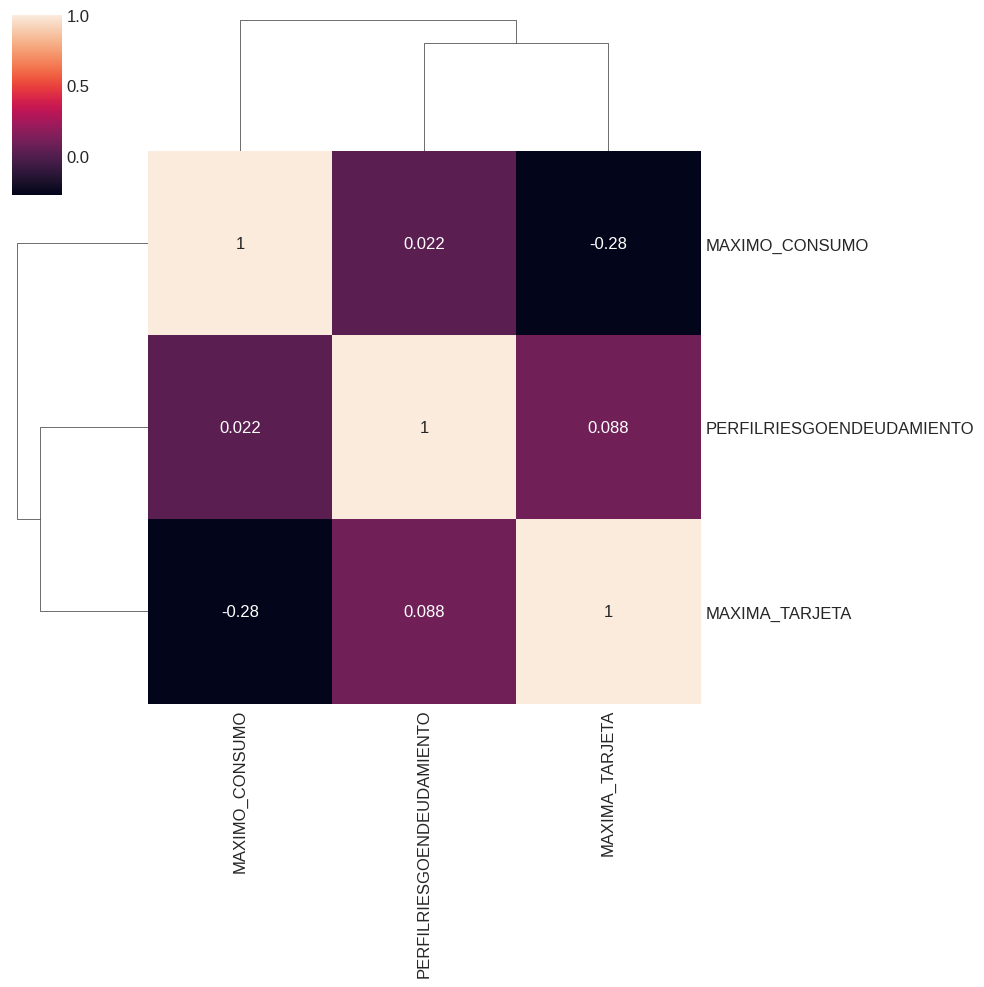

<ipython-input-144-c7bd810ce1d9>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_data.replace([np.inf, -np.inf], np.nan, inplace=True)


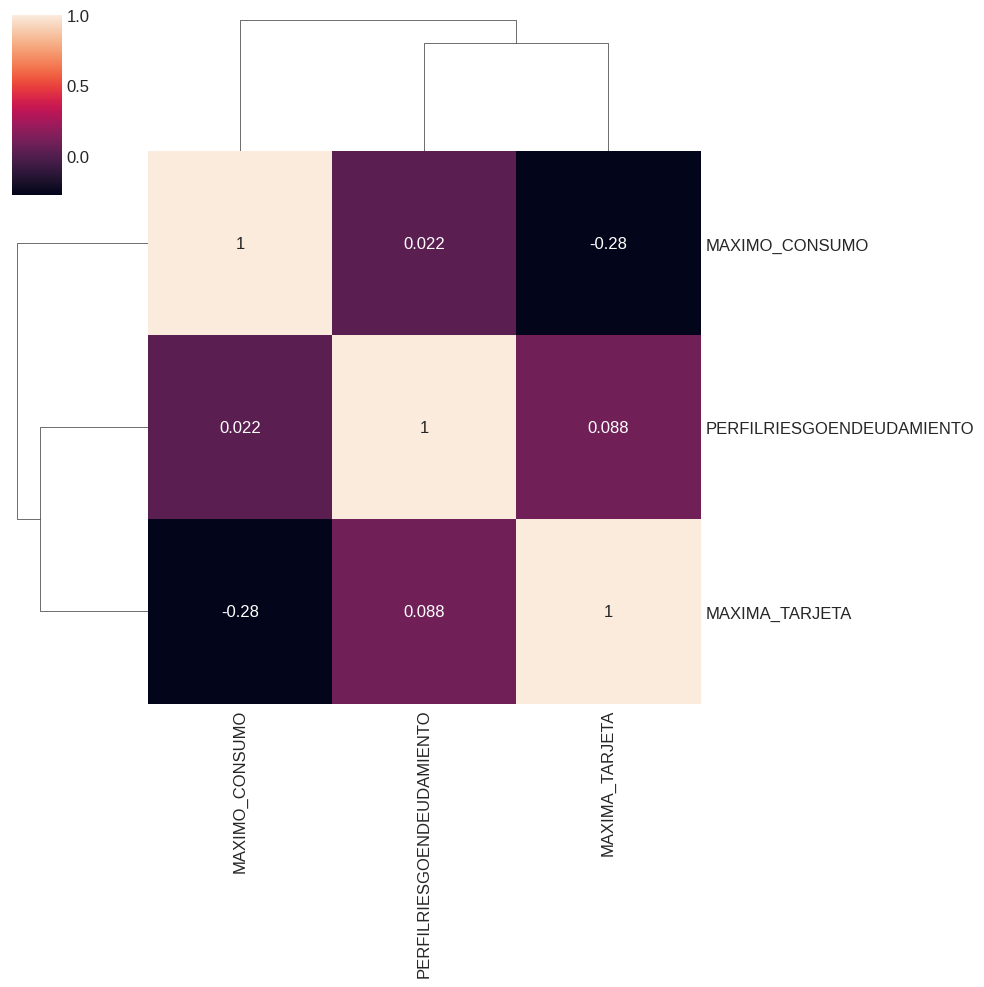

In [144]:
# Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
# Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy
from sklearn.preprocessing import OneHotEncoder

X = df[['PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO']]

categorical_features = ['sexo', 'estado_civil']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # handle_unknown='ignore' para evitar errores con valores no vistos
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_features]))
encoded_data.columns = encoder.get_feature_names_out(categorical_features)
encoded_data = pd.concat([df.drop(categorical_features, axis=1), encoded_data], axis=1)
encoded_data = encoded_data[X.columns] # Select columns from X

# Replace infinite values with NaN
encoded_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values if any exist after replacing inf
# ***CHANGED***: Replace NaN with a finite value (like 0) instead of dropping rows
encoded_data = encoded_data.fillna(0)

# Ahora ser puede crear el mapa de clúster
sns.clustermap(encoded_data.corr(), annot=True)
plt.show()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # handle_unknown='ignore' para evitar errores con valores no vistos
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_features]))
encoded_data.columns = encoder.get_feature_names_out(categorical_features)
encoded_data = pd.concat([df.drop(categorical_features, axis=1), encoded_data], axis=1)
encoded_data = X

# Replace infinite values with NaN
encoded_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values if any exist after replacing inf
# ***CHANGED***: Replace NaN with a finite value (like 0) instead of dropping rows
encoded_data = encoded_data.fillna(0)

# Ahora ser puede crear el mapa de clúster
sns.clustermap(encoded_data.corr(), annot=True)
plt.show()

# Interpretación de los resultados:

# 1.  'PERFILRIESGOENDEUDAMIENTO' vs 'MAXIMA_TARJETA':
  - Observe el valor numérico en la celda que intersecta estas dos variables.
  - Si el valor es cercano a 1, significa que existe una fuerte correlación positiva: a mayor perfil de riesgo de endeudamiento, mayor es la máxima tarjeta de crédito disponible.
  - Si el valor es cercano a -1, existe una fuerte correlación negativa: a mayor perfil de riesgo, menor máxima tarjeta disponible.
  - Un valor cercano a 0 indica poca o ninguna correlación lineal entre ambas variables.
    
# 2. 'PERFILRIESGOENDEUDAMIENTO' vs 'MAXIMO_CONSUMO':
  -  Analice la celda correspondiente. Un valor cercano a 1 indicaría que a mayor riesgo, mayor consumo. Un valor cercano a -1 implicaría que a mayor riesgo, menor consumo, y un valor cercano a 0 indica poca o ninguna correlación lineal.

# 3. 'MAXIMA_TARJETA' vs 'MAXIMO_CONSUMO':
  -  Revise la celda correspondiente. Un valor cercano a 1 indicaría una fuerte correlación positiva: mayor límite de tarjeta implica mayor consumo. Un valor cercano a -1 indicaría una correlación negativa: mayor límite de tarjeta implica menor consumo, y un valor cercano a 0, indica poca correlación lineal.
    
El dendrograma (gráfico de "árbol") muestra cómo se agrupan las variables según su correlación.
Variables que están cerca en el dendrograma tienen correlaciones más altas entre ellas.

# Consideraciones adicionales:

- Correlación no implica causalidad: Aunque exista una alta correlación entre dos variables, no significa que una causa la otra. Puede haber otras variables subyacentes que influyan en ambas.

- Datos categoricos: Recuerda que los datos categóricos (sexo y estado civil) han sido procesados con OneHotEncoder, creando variables binarias (0 o 1).  Las correlaciones con las variables numéricas muestran como las categorias influyen en estas.

- Valores Nulos: El codigo reemplaza valores infinitos con NaN (valores faltantes) y luego sustituye los NaN por cero para poder calcular las correlaciones.

En resumen, examina los valores numéricos en la matriz de correlación y el dendrograma para entender las relaciones entre las variables.

In [145]:
# 8. Análisis preliminar de la distancia de Gower
# Seleccionamos variables para el cálculo de la distancia de Gower

def gower_distance_simplified(X_num, X_cat):
    """
    Implementación simplificada de la distancia de Gower para datos mixtos.

    Parámetros:
    X_num: DataFrame con variables numéricas
    X_cat: DataFrame con variables categóricas

    Retorna:
    Matriz de distancias
    """
    # Normalización de variables numéricas
    ranges = np.max(X_num, axis=0) - np.min(X_num, axis=0)
    X_num_norm = X_num / ranges

    # Distancia euclidiana normalizada para variables numéricas
    num_dist = pdist(X_num_norm, metric='euclidean')

    # Distancia de coincidencia simple para variables categóricas
    cat_dist = np.zeros(len(num_dist))
    if not X_cat.empty:
        n_cat = X_cat.shape[1]
        for i, col in enumerate(X_cat.columns):
            # One-hot encoding de cada variable categórica
            dummies = pd.get_dummies(X_cat[col], prefix=col)
            # Cálculo de distancia para esta variable
            cat_dist_i = pdist(dummies.values, metric='jaccard')
            # Acumulación ponderada
            cat_dist += cat_dist_i / n_cat

    # Combinación de distancias (peso igual para numéricas y categóricas)
    if not X_cat.empty:
        gower_dist = (num_dist + cat_dist) / 2
    else:
        gower_dist = num_dist

    return squareform(gower_dist)


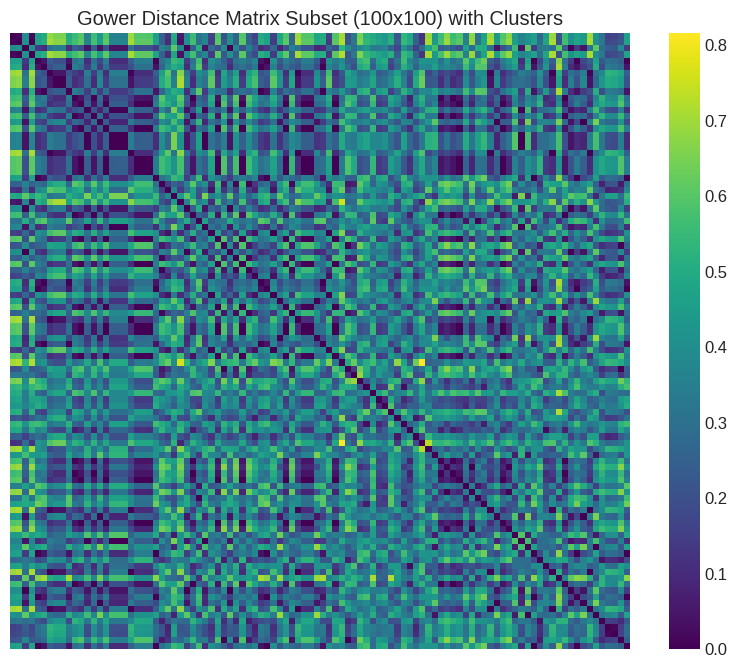

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import squareform
from gower import gower_matrix  # Make sure you have installed gower: !pip install gower

# Assuming 'df' is your DataFrame and you want to calculate Gower distance on all columns
# Select the relevant columns for Gower distance calculation
selected_cols = ['PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO', 'sexo', 'estado_civil']  # Add relevant columns
data_for_gower = df[selected_cols]

# Calculate Gower distance matrix
gower_dist_matrix = gower_matrix(data_for_gower)

# ***CHANGED***: Adjust the size to match gower_dist_matrix or reduce matrix size
# Create a DataFrame from the Gower distance matrix using the full dataset
gower_df = pd.DataFrame(gower_dist_matrix, index=df.index, columns=df.index)

# Visualize the Gower distance matrix with cluster assignments
# ***CHANGED***: Use a smaller subset for visualization for better performance
subset_size = 100  # adjust as needed
gower_subset = gower_df.iloc[:subset_size, :subset_size]

plt.figure(figsize=(10, 8))
sns.heatmap(gower_subset, cmap='viridis', xticklabels=False, yticklabels=False)  # Remove x and y ticks
plt.title(f'Gower Distance Matrix Subset ({subset_size}x{subset_size}) with Clusters')
plt.show()

# ***REMOVED***: Alternative visualization is redundant since we're using a subset above

El código proporcionado genera dos visualizaciones clave: un biplot y un mapa de calor de la matriz de distancia de Gower. Analicemos cada una por separado para entender la información que presentan:

**1. Biplot:**

El biplot es una herramienta visual que muestra simultáneamente la proyección de los datos en las dos primeras componentes principales de un Análisis de Componentes Principales (PCA) y las coordenadas de las variables originales en este nuevo espacio.  En este caso específico:

* **Puntos:** Cada punto representa un cliente. La posición del punto en el plano definido por las dos componentes principales (PC1 y PC2) indica la posición del cliente en el espacio de las variables originales, reflejando su "similitud" en relación a las variables consideradas.  La coloración de los puntos indica la asignación del cliente a un cluster determinado (Cluster 0, 1 o 2), resultante de una técnica de agrupación previa como *K-means*. La proximidad de los puntos del mismo color indica una alta similitud entre los clientes dentro de cada cluster.

* **Flechas:** Las flechas representan las variables originales ('PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO').  La dirección y la longitud de cada flecha indican la correlación de la variable con las componentes principales.  Por ejemplo:
    * Una flecha larga que apunta hacia la derecha en la PC1 indica que la variable está fuertemente correlacionada con esta componente, y que los clientes con valores altos en esa variable tenderán a tener valores altos en PC1, y viceversa.
    * Flechas cercanas entre sí indican que las variables correspondientes están correlacionadas.
    * La posición de una flecha en relación a un cluster muestra la influencia de la variable en la composición de ese cluster.

* **Interpretación conjunta:** Al analizar la posición de los puntos (clientes) en relación con las flechas (variables), podemos entender qué características contribuyen a la formación de cada cluster. Por ejemplo, si un cluster se agrupa en una zona del gráfico donde la flecha de 'MAXIMO_CONSUMO' apunta hacia afuera, los clientes de ese cluster tienden a tener altos valores en esta variable.

En resumen, el biplot nos permite visualizar la relación entre clientes y las variables que mejor describen su comportamiento en grupos o clusters. Permite identificar características distintivas de cada cluster.

**2. Mapa de Calor de la Distancia de Gower (Subset):**

La distancia de Gower es una medida de similitud entre observaciones con variables de tipos diferentes (numéricas y categóricas).  El código genera un mapa de calor de una *submuestra* de la matriz de distancias de Gower.

* **Matriz de Distancias:** Cada celda del mapa de calor representa la distancia de Gower entre dos clientes. Las celdas más oscuras indican una distancia mayor, es decir, menor similitud entre clientes, mientras que las celdas más claras indican distancias menores (mayor similitud).

* **Clusterización Implícita:** Observando patrones visuales en el mapa de calor (grupos de celdas claras), podemos notar la agrupación de clientes que son similares entre sí, de manera que se puede observar cierta información de agrupación similar a la mostrada en el biplot.

* **Subconjunto:** El código presenta solo una parte de la matriz completa. La visualización del conjunto completo no es práctica, debido al gran tamaño que pudiera tener y el tiempo de procesamiento requerido para dibujar la totalidad.

**Interpretación Conjunta:**

La comparación entre el biplot y el mapa de calor de la distancia de Gower ofrece una perspectiva más completa de los datos. El biplot muestra la influencia de las variables en la formación de los clusters y sus coordenadas en el plano PCA, mientras que el mapa de calor de Gower ofrece una representación cuantitativa de la similitud entre los clientes, dando una perspectiva global de las agrupaciones de individuos.

En resumen, este análisis nos provee herramientas para determinar que variables son importantes para distinguir entre clientes y agruparlos en clusters significativos, basados en similitudes y diferencias. La clave está en analizar las visualizaciones y la información de las agrupaciones para llegar a conclusiones robustas, validando los clusters encontrados, para ello, se requiere conocer profundamente los datos y el negocio subyacente.


In [147]:
df['clusters'] = ''
# Print all columns
df.columns

Index(['IDENTIFICACION', 'PERFILRIESGOENDEUDAMIENTO', 'EDAD', 'sexo',
       'estado_civil', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO', 'PAIS_DOM_CAL_DAT',
       'PROV_DOM_CAL_DAT', 'CIUDAD_DOM_CAL_DAT', 'TEL_DOM_1_CAL_DAT',
       'TEL_TRA_1_CAL_DAT', 'CELULAR_1', 'CELULAR_BAN', 'CORREO_BAN',
       'cluster', 'clusters'],
      dtype='object')

In [148]:
# prompt: from google.colab import files
# files.download('BBDD_ParaInciar_MakDigital (1).xlsx') añadirle la columna "clusters"

# Assuming 'df' is your DataFrame and the 'cluster' column already exists

# Add the 'clusters' column to the DataFrame (if it doesn't exist)
if 'clusters' not in df.columns:
    df['clusters'] = df['cluster']

# Save the DataFrame to an Excel file
df.to_excel('BBDD_ParaInciar_MakDigital_with_clusters.xlsx', index=False)

# Download the file
files.download('BBDD_ParaInciar_MakDigital_with_clusters.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
# prompt: # prompt: descargar todas las columnas existentes en un nuevo dataset con  la data antes de ser transformada en datos numericos, volver a transformarlos en categóricos

# Create a copy of the original DataFrame before numerical transformations
df_original = df.copy()

# ... (rest of your existing code)

# Convert numerical features back to categorical in the copied DataFrame
categorical_features = ['PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO'] # Example, replace with your actual categorical columns
for col in categorical_features:
    df_original[col] = df_original[col].astype('object') # Or appropriate categorical type

# Now df_original contains all columns with the data before numerical transformations
# and the specified columns are converted back to categorical

# Example: Save df_original to a new CSV file
df_original.to_csv('original_data.csv', index=False)
files.download('original_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

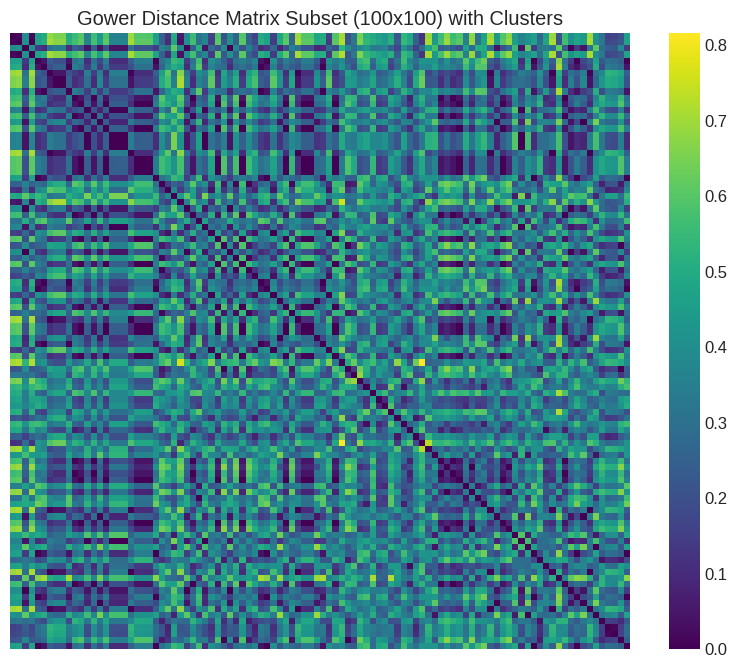

In [150]:
# prompt: df contenido

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, squareform
from gower import gower_matrix

# Assuming 'df' is your DataFrame and you want to calculate Gower distance on all columns
# Select the relevant columns for Gower distance calculation
selected_cols = ['PERFILRIESGOENDEUDAMIENTO', 'MAXIMA_TARJETA', 'MAXIMO_CONSUMO', 'sexo', 'estado_civil']  # Add relevant columns
data_for_gower = df[selected_cols]

# Calculate Gower distance matrix
gower_dist_matrix = gower_matrix(data_for_gower)

# ***CHANGED***: Adjust the size to match gower_dist_matrix or reduce matrix size
# Create a DataFrame from the Gower distance matrix using the full dataset
gower_df = pd.DataFrame(gower_dist_matrix, index=df.index, columns=df.index)

# Visualize the Gower distance matrix with cluster assignments
# ***CHANGED***: Use a smaller subset for visualization for better performance
subset_size = 100  # adjust as needed
gower_subset = gower_df.iloc[:subset_size, :subset_size]

plt.figure(figsize=(10, 8))
sns.heatmap(gower_subset, cmap='viridis', xticklabels=False, yticklabels=False)  # Remove x and y ticks
plt.title(f'Gower Distance Matrix Subset ({subset_size}x{subset_size}) with Clusters')
plt.show()


In [151]:
# prompt: descargar todas las columnas existentes en un nuevo dataset

# Assuming 'df' is your DataFrame and you want to download all columns
from google.colab import files

# Download the entire DataFrame to a CSV file
df.to_csv('downloaded_dataset.csv', index=False)  # Set index=False to avoid saving the index
files.download('downloaded_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>